In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import analysis
from sklearn import preprocessing
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Helper functions and Initialization
%matplotlib inline

def plotAllData(label, x = None, y = None):
    plt.title(label)
    plt.plot(x, y)
    plt.show()
    
def plotBitCoin(bitCoin, date, fieldName):
    plotAllData(fieldName, date, bitCoin[fieldName])
    
def plotAllFields(data, start = 1, dateClass = True):
    columns = data.columns
    if dateClass:
        date = pd.to_datetime(data[columns[0]])
    for i in range(start, len(columns)):
        print('Graph: ', columns[i])
        plt.title(columns[i])
        if dateClass:
            plt.plot(date, data[columns[i]])
        else:
            plt.plot(data[columns[i]])
        plt.show()
          
def plotCorrelation(data):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(10,10))  
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)
    
# Normalize data using Min Max scaling
def dataNormalization(nData):
    x = nData.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    scaledData = pd.DataFrame(x_scaled, columns = list(nData.columns))
    return scaledData

def analyzeCDFs(data, fields):
    for fld in fields:
        x, y = utils.plot_a(np.array(data[fld]))
        plt.plot(x, y)
        plt.title(fld)
        plt.show()
        
def ConvertGamblingData(gambling, splittedDate = False):
    if splittedDate:
        newDF = gambling[gambling['Game Stream'] == 'Casino'][['Month','Year']]
    else:
        newDF = gambling[gambling['Game Stream'] == 'Casino'][['Month Year']]
    casino = np.array(gambling[gambling['Game Stream'] == 'Casino'][['Player Expenditure $']])
    egm = np.array(gambling[gambling['Game Stream'] == 'EGM'][['Player Expenditure $']])
    keno = np.array(gambling[gambling['Game Stream'] == 'Keno'][['Player Expenditure $']])
    lottery = np.array(gambling[gambling['Game Stream'] == 'Lottery'][['Player Expenditure $']])
    wagering = np.array(gambling[gambling['Game Stream'] == 'Wagering'][['Player Expenditure $']])
    # IGNORE CNP AS NO DATA IS AVAILABLE
    # cnp = np.array(gambling[gambling['Game Stream'] == 'CNP'][['Player Expenditure $']])

    # Add into DF
    newDF['Casino'] = casino
    newDF['EGM'] = egm
    newDF['Keno'] = keno
    newDF['Lottery'] = lottery
    newDF['Wagering'] = wagering
    # Re-Index
    newDF = newDF.reset_index(drop = True)
    return newDF

def plotD(fdata, gap, field):
    for year in [2011, 2012, 2013, 2014, 2015]:
        data = fdata[fdata['Year'] == year]
        vals = []
        i = 1
        while i <= 12:
            end = i + gap
            if end > 12:
                end = 12
            D1 = data[data['Month'] >= i]
            D2 = D1[D1['Month'] <= end][field].sum()
            #print(D2)
            i = i + gap
            vals.append(D2)
        plt.plot(vals)
    plt.title(field+ ' Gap :'+str(gap))
    plt.show()
    
def wald(X, Y):
    p1_hat = sum(X) / len(X)
    p2_hat = sum(Y) / len(Y)
    t_sum = 0
    for i in X:
        t_sum += (i - p1_hat)**2
    var_1 = t_sum / len(X)
    t_sum = 0
    for i in Y:
        t_sum += (i - p2_hat)**2
    var_2 = t_sum / len(Y)
    delta = abs(p1_hat - p2_hat)
    se_hat = np.sqrt((var_1/ len(X)) + (var_2 / len(Y)))
    w = abs((p1_hat - p2_hat) / se_hat)
    print(w)
    if w > 1.96:
        print('Reject Null')
    else:
        print('Accept Null')
    return w, delta, se_hat

def getPVal(X):
    return 2*stats.norm.cdf(-X)
    
def getConfidenceInterval(delta, se_hat, alpha = 1.96):
    lower_interval = delta - alpha * se_hat
    upper_interval = delta + alpha * se_hat
    return [lower_interval, upper_interval]

def runTests(X, Y, label):
    print('== Running Tests for {} =='.format(label))
    avgBTCYearly, delta, se_hat = wald(X, Y)
    print('P-Value: {}'.format(getPVal(avgBTCYearly)))
    cInterval = getConfidenceInterval(delta, se_hat)
    print('CI: {} '.format(cInterval))
    print('P-Val of P-Test: {}'.format(PermutationTest(X, Y)))
    
# Permutation Test
def PermutationTest(X, Y):
    tObs = abs(np.mean(X) - np.mean(Y))

    samples = np.append(X,Y)
    count = 0.0
    nFact = 100000 #(2 << (len(X) + len(Y)))
    for _ in range(nFact):
        tmp = np.random.permutation(samples)
        xP = tmp[:len(X)]
        yP = tmp[len(X):]
        tP = abs(np.mean(xP) - np.mean(yP))
        if tP > tObs:
            count += 1
    p = count / nFact
    return p

In [3]:
# Bitcoin Price
bPrice = pd.read_csv('Data/bitcoin_price.csv')
dateData = pd.to_datetime(bPrice['Date'])

In [4]:
#plotAllFields(bPrice)

In [5]:
# Bit coin dataset
btc_dataset = pd.read_csv('Data/bitcoin_dataset.csv')
list(btc_dataset.columns)

['Date',
 'btc_market_price',
 'btc_total_bitcoins',
 'btc_market_cap',
 'btc_trade_volume',
 'btc_blocks_size',
 'btc_avg_block_size',
 'btc_n_orphaned_blocks',
 'btc_n_transactions_per_block',
 'btc_median_confirmation_time',
 'btc_hash_rate',
 'btc_difficulty',
 'btc_miners_revenue',
 'btc_transaction_fees',
 'btc_cost_per_transaction_percent',
 'btc_cost_per_transaction',
 'btc_n_unique_addresses',
 'btc_n_transactions',
 'btc_n_transactions_total',
 'btc_n_transactions_excluding_popular',
 'btc_n_transactions_excluding_chains_longer_than_100',
 'btc_output_volume',
 'btc_estimated_transaction_volume',
 'btc_estimated_transaction_volume_usd']

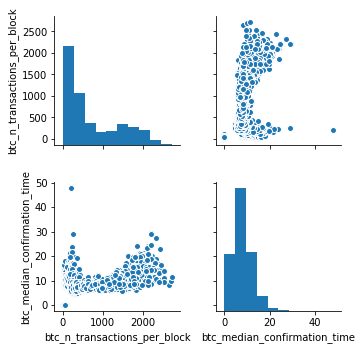

In [6]:
sns.pairplot(btc_dataset[btc_dataset.columns[[8, 9]]], palette='afmhot')

In [7]:
#sns.pairplot(hue = 'Year', palette='afmhot', data=bData)

In [8]:
#sns.factorplot(x = 'btc_hash_rate', y= 'btc_difficulty', hue = 'Year', data = bData)

('Graph: ', 'btc_market_price')


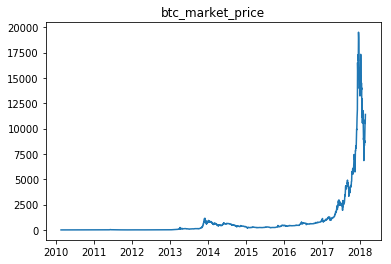

('Graph: ', 'btc_total_bitcoins')


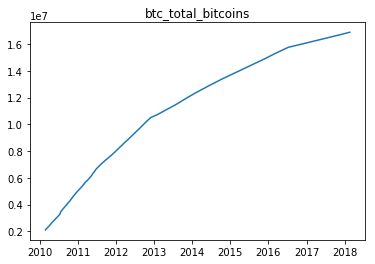

('Graph: ', 'btc_market_cap')


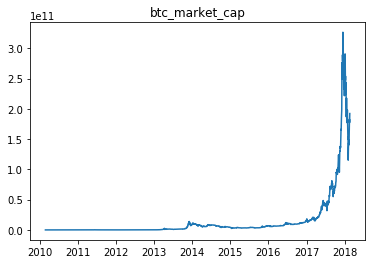

('Graph: ', 'btc_trade_volume')


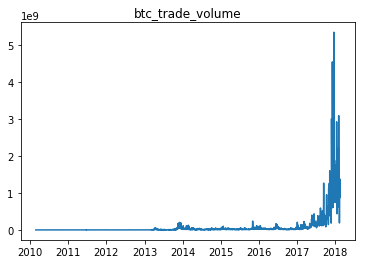

('Graph: ', 'btc_blocks_size')


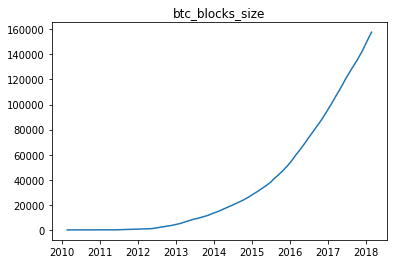

('Graph: ', 'btc_avg_block_size')


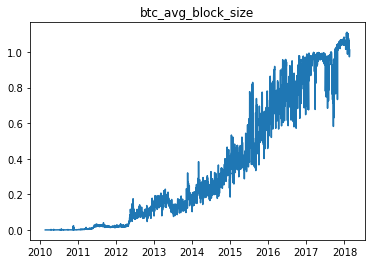

('Graph: ', 'btc_n_orphaned_blocks')


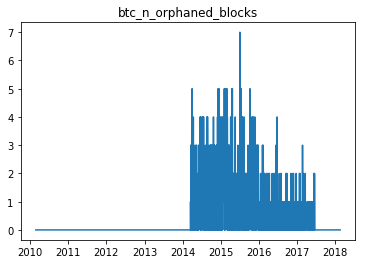

('Graph: ', 'btc_n_transactions_per_block')


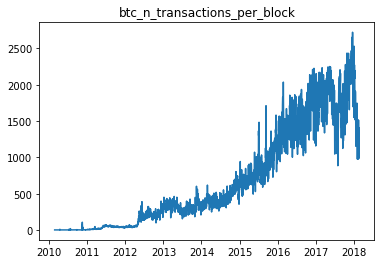

('Graph: ', 'btc_median_confirmation_time')


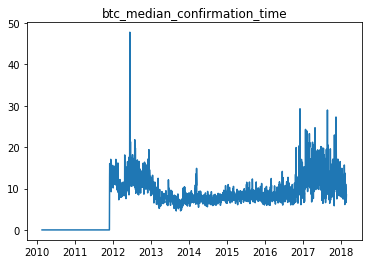

('Graph: ', 'btc_hash_rate')


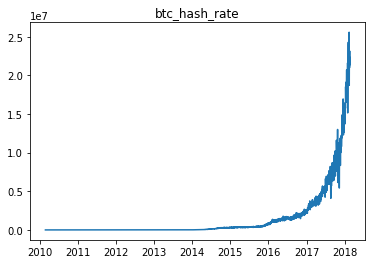

('Graph: ', 'btc_difficulty')


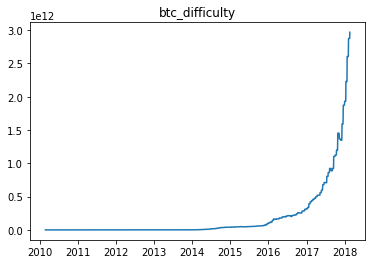

('Graph: ', 'btc_miners_revenue')


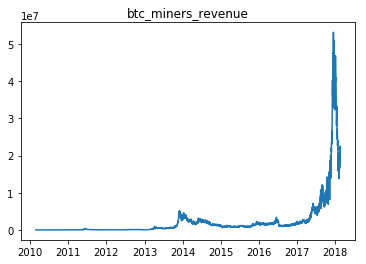

('Graph: ', 'btc_transaction_fees')


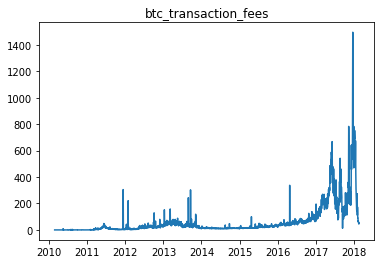

('Graph: ', 'btc_cost_per_transaction_percent')


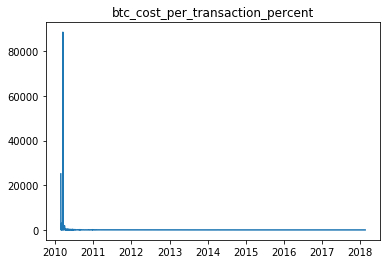

('Graph: ', 'btc_cost_per_transaction')


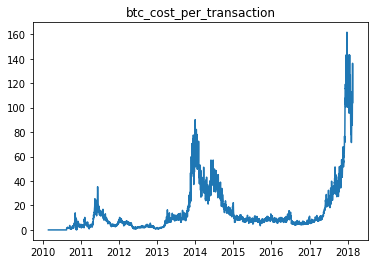

('Graph: ', 'btc_n_unique_addresses')


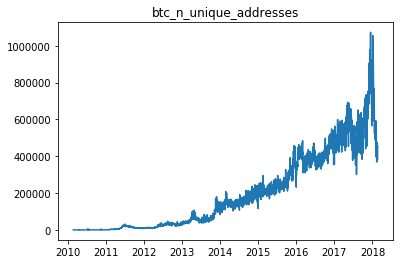

('Graph: ', 'btc_n_transactions')


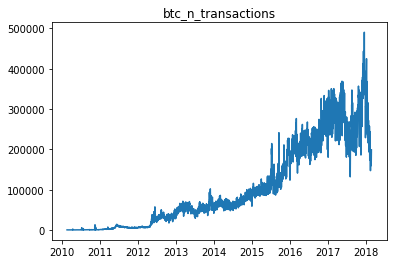

('Graph: ', 'btc_n_transactions_total')


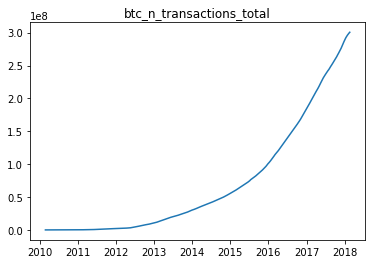

('Graph: ', 'btc_n_transactions_excluding_popular')


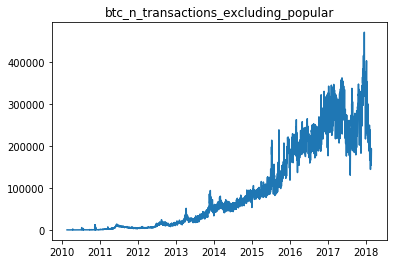

('Graph: ', 'btc_n_transactions_excluding_chains_longer_than_100')


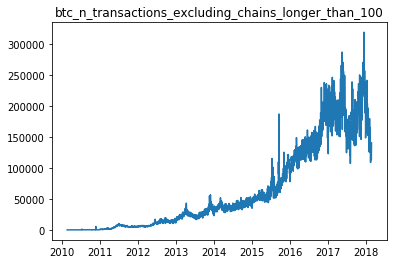

('Graph: ', 'btc_output_volume')


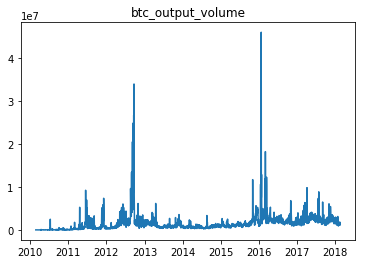

('Graph: ', 'btc_estimated_transaction_volume')


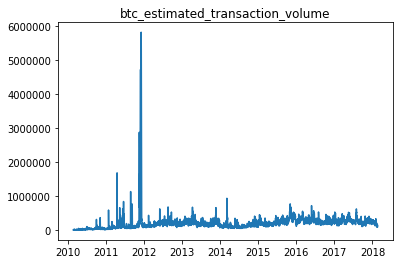

('Graph: ', 'btc_estimated_transaction_volume_usd')


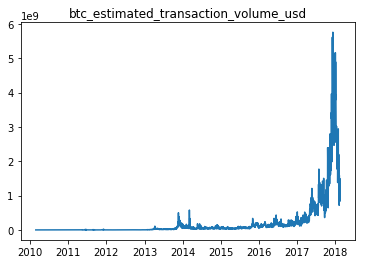

In [9]:
plotAllFields(btc_dataset)

In [10]:
# bitcoin_cash_price.csv
bData = pd.read_csv('Data/bitcoin_cash_price.csv')
print('Columns:', bData.columns)

('Columns:', Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume', u'Market Cap'], dtype='object'))


In [11]:
# get Year data
bData['NDate'] = pd.to_datetime(bData['Date'])
bData['Year'] = bData['NDate'].apply(lambda x: x.year)
#bData['Year'] = date

('Graph: ', 'Open')


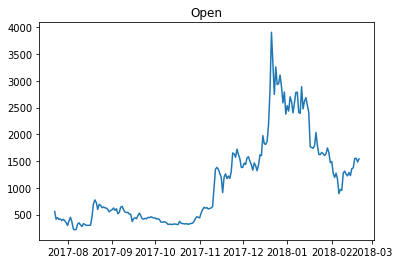

('Graph: ', 'High')


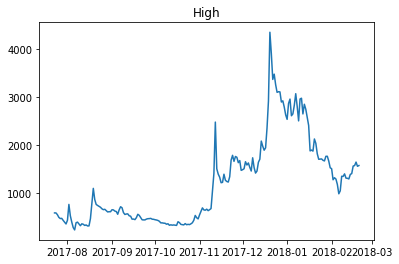

('Graph: ', 'Low')


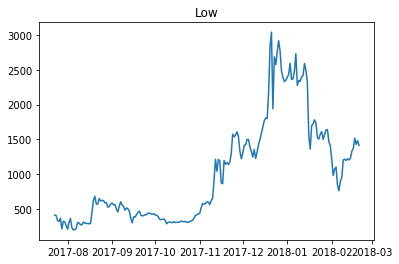

('Graph: ', 'Close')


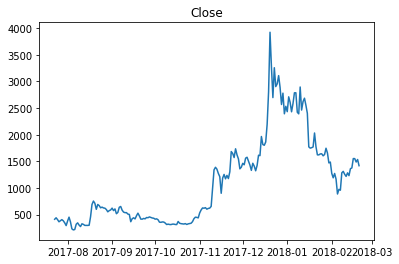

('Graph: ', 'Volume')


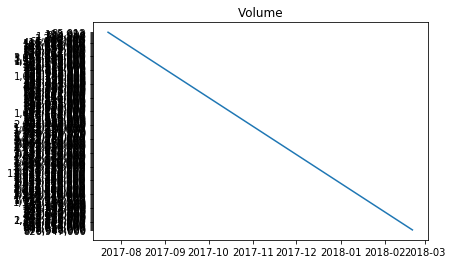

('Graph: ', 'Market Cap')


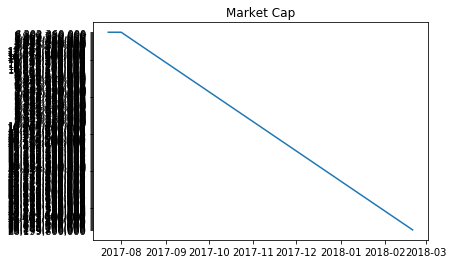

('Graph: ', 'NDate')


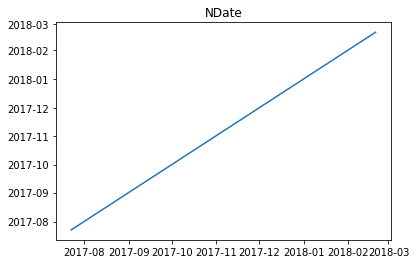

('Graph: ', 'Year')


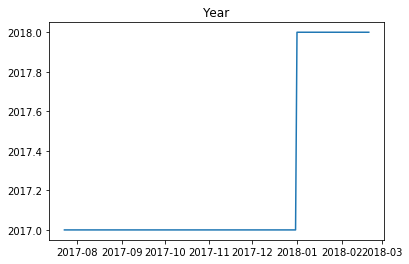

In [12]:
plotAllFields(bData)

/home/bhushan/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


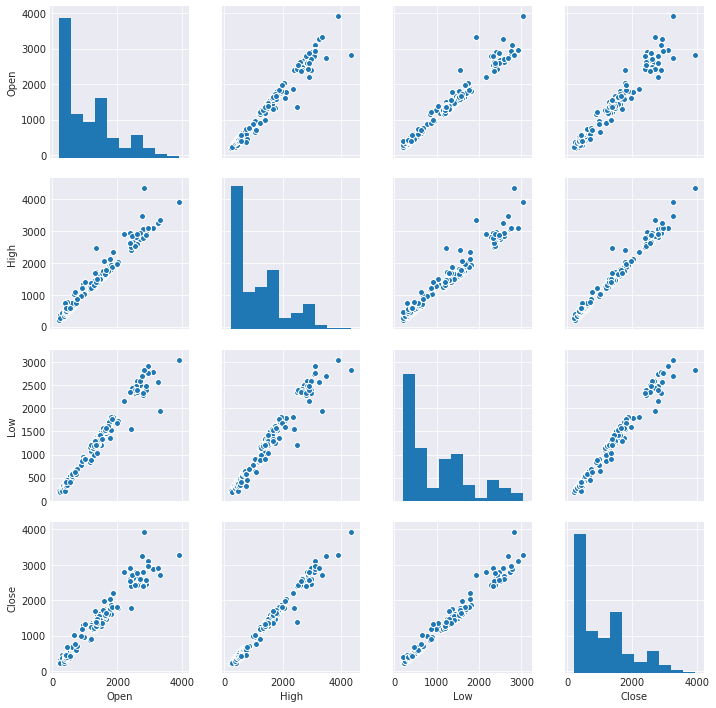

In [13]:
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
sns.pairplot(bData[bData.columns[[1,2,3,4,5,6]]], palette=sns.color_palette("Reds_d", n_colors=7, desat=1)) #'afmhot')

### Convert bit-coin data month wise

In [14]:
# Using BTC DATASET
btc_dataset = pd.read_csv('Data/bitcoin_dataset.csv')
date = pd.to_datetime(btc_dataset['Date'])
btc_dataset['Day'] = date.dt.day
btc_dataset['Month'] = date.dt.month
btc_dataset['Year'] = date.dt.year

nData = btc_dataset #[['Month', 'Year', 'btc_market_price', 'btc_trade_volume', 'btc_n_transactions_total']]
nD = nData[nData['Year'] >= 2013]

# Take Monthly Average
mAvg_BTC = nD.groupby(['Year', 'Month']).mean()
mAvg_BTC = mAvg_BTC.reset_index()

In [15]:
mAvg_BTC = mAvg_BTC[:52]
mAvg_BTC

Year  Month  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0   2013      1         15.847793        1.067012e+07    1.691648e+08   
1   2013      2         26.148923        1.078290e+07    2.820874e+08   
2   2013      3         57.670729        1.090784e+07    6.297676e+08   
3   2013      4        130.850051        1.103919e+07    1.444396e+09   
4   2013      5        120.252263        1.116175e+07    1.342483e+09   
5   2013      6        107.988127        1.129280e+07    1.219255e+09   
6   2013      7         90.097818        1.142221e+07    1.029389e+09   
7   2013      8        107.626459        1.156230e+07    1.244630e+09   
8   2013      9        125.171000        1.170625e+07    1.465266e+09   
9   2013     10        153.181935        1.185271e+07    1.816994e+09   
10  2013     11        538.100000        1.199662e+07    6.465440e+09   
11  2013     12        790.453871        1.213190e+07    9.585202e+09   
12  2014      1        821.143871        1.227011e+07    1.007514e+10   
13  2014      2        666.894286        1.239886e+07    8.265870e+09   
14  2014      3        594.324516        1.252276e+07    7.440960e+09   
15  2014      4        461.246667        1.265214e+07    5.836038e+09   
16  2014      5        487.046774        1.277712e+07    6.224989e+09   
17  2014      6        613.369333        1.290326e+07    7.913547e+09   
18  2014      7        619.258710        1.302640e+07    8.066116e+09   
19  2014      8        537.705484        1.314908e+07    7.069022e+09   
20  2014      9        445.007333        1.327390e+07    5.905783e+09   
21  2014     10        363.517419        1.339046e+07    4.867686e+09   
22  2014     11        366.218333        1.350545e+07    4.946343e+09   
23  2014     12        343.123226        1.361493e+07    4.670904e+09   
24  2015      1        249.274839        1.373022e+07    3.421960e+09   
25  2015      2        233.739286        1.383886e+07    3.234941e+09   
26  2015      3        268.133548        1.394755e+07    3.739481e+09   
27  2015      4        234.606000        1.405837e+07    3.297901e+09   
28  2015      5        237.142258        1.416752e+07    3.359690e+09   
29  2015      6        237.276333        1.427803e+07    3.388146e+09   
30  2015      7        279.886774        1.438999e+07    4.027833e+09   
31  2015      8        252.816129        1.450404e+07    3.666164e+09   
32  2015      9        233.819000        1.461784e+07    3.417928e+09   
33  2015     10        265.384516        1.472993e+07    3.909854e+09   
34  2015     11        349.386000        1.484527e+07    5.186344e+09   
35  2015     12        422.022258        1.496753e+07    6.317406e+09   
36  2016      1        410.954194        1.509007e+07    6.200581e+09   
37  2016      2        402.526552        1.521231e+07    6.124100e+09   
38  2016      3        415.502258        1.532323e+07    6.366825e+09   
39  2016      4        434.075333        1.543725e+07    6.698092e+09   
40  2016      5        460.761290        1.555180e+07    7.166094e+09   
41  2016      6        640.389954        1.566401e+07    1.006520e+10   
42  2016      7        661.036602        1.576084e+07    1.043479e+10   
43  2016      8        579.744405        1.581894e+07    9.201481e+09   
44  2016      9        607.146550        1.587584e+07    9.661413e+09   
45  2016     10        642.163788        1.593296e+07    1.026940e+10   
46  2016     11        724.360973        1.598942e+07    1.160023e+10   
47  2016     12        822.463950        1.604708e+07    1.322795e+10   
48  2017      1        909.749629        1.610701e+07    1.468449e+10   
49  2017      2       1063.003843        1.616441e+07    1.720776e+10   
50  2017      3       1129.199654        1.621978e+07    1.828479e+10   
51  2017      4       1221.494590        1.627660e+07    2.019389e+10   

    btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0       8.785402e+05      4560.064516            0.146898   
1       1.65

In [16]:
# uMonths = np.unique(np.array(btc_dataset[['Month']]))
# uYears = np.unique(np.array(btc_dataset[['Year']]))
# print(uMonths)
# print(uYears)

# nData = btc_dataset[['Month', 'Year', 'btc_market_price', 'btc_trade_volume', 'btc_n_transactions_total']]
# nData = nData[nData['Year'] >= 2013]
# #for year in uYears:
# #    for month in uMonths:
# print(nData[:5])     

In [17]:
# mD = nData[nData['Month'] == 2]
# nD = mD[mD['Year'] == 2014]
# print(nD['btc_market_price'].mean())
# print(nD['btc_trade_volume'].mean())
# print(nD['btc_n_transactions_total'].mean())
# #nD[['btc_market_price', 'btc_trade_volume', 'btc_n_transcations_total']].mean()

### GAMBLING ANALYSIS

In [18]:
gambling = pd.read_csv('Data/Casino/20170616_OLGR_All-gambling-data.csv')
#dateData = pd.to_datetime(bPrice['Date'])

In [19]:
#print(gambling[-300:])

In [20]:
gambling.columns

Index([u'Month Year', u'Game Stream', u'Player Expenditure $'], dtype='object')

In [21]:
cols = list(gambling.columns.values)
vals = gambling['Game Stream'].unique()
print(vals)

['Casino' 'EGM' 'Keno' 'Lottery' 'Wagering' 'CNP']


In [23]:
newDF = ConvertGamblingData(gambling)
print(newDF.shape)

(154, 6)


In [24]:
gamblingData = newDF[:][-52:]
gamblingData = gamblingData.reset_index(drop = True)

In [25]:
# tData = newDF[:][:]
# print(newDF[:][-52:])
gamblingData.shape

(52, 6)

('Graph: ', 'Casino')


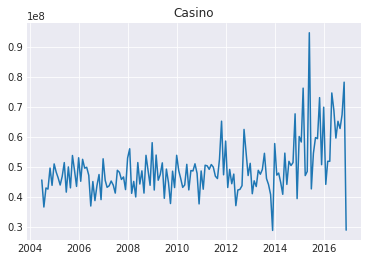

('Graph: ', 'EGM')


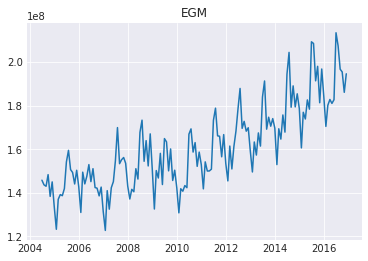

('Graph: ', 'Keno')


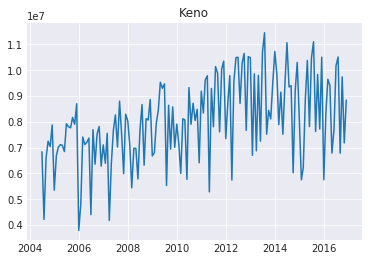

('Graph: ', 'Lottery')


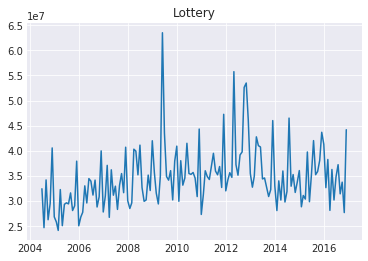

('Graph: ', 'Wagering')


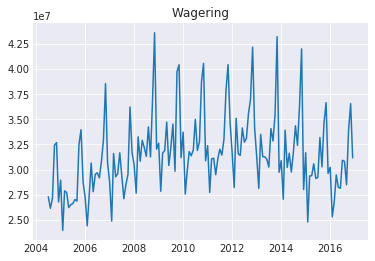

In [26]:
plotAllFields(newDF[:150], start = 1, dateClass = True)

In [27]:
mAvg_BTC = mAvg_BTC.reset_index(drop = True)
print(mAvg_BTC.columns)
print(gamblingData.columns)

Index([u'Year', u'Month', u'btc_market_price', u'btc_total_bitcoins',
       u'btc_market_cap', u'btc_trade_volume', u'btc_blocks_size',
       u'btc_avg_block_size', u'btc_n_orphaned_blocks',
       u'btc_n_transactions_per_block', u'btc_median_confirmation_time',
       u'btc_hash_rate', u'btc_difficulty', u'btc_miners_revenue',
       u'btc_transaction_fees', u'btc_cost_per_transaction_percent',
       u'btc_cost_per_transaction', u'btc_n_unique_addresses',
       u'btc_n_transactions', u'btc_n_transactions_total',
       u'btc_n_transactions_excluding_popular',
       u'btc_n_transactions_excluding_chains_longer_than_100',
       u'btc_output_volume', u'btc_estimated_transaction_volume',
       u'btc_estimated_transaction_volume_usd', u'Day'],
      dtype='object')
Index([u'Month Year', u'Casino', u'EGM', u'Keno', u'Lottery', u'Wagering'], dtype='object')


In [28]:
mAvg_BTC[['Casino', 'EGM', 'Keno', 'Lottery', 'Wagering']] = gamblingData[['Casino', 'EGM', 'Keno', 'Lottery', 'Wagering']] 
mAvg_BTC[:2]

Year  Month  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2013      1         15.847793        1.067012e+07    1.691648e+08   
1  2013      2         26.148923        1.078290e+07    2.820874e+08   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0      8.785402e+05      4560.064516            0.146898   
1      1.654326e+06      5242.428571            0.156744   

   btc_n_orphaned_blocks  btc_n_transactions_per_block     ...       \
0                    0.0                     337.83871     ...        
1                    0.0                     350.00000     ...        

   btc_n_transactions_excluding_chains_longer_than_100  btc_output_volume  \
0                                       18436.903226         1.667659e+06   
1                                       21900.178571         1.518587e+06   

   btc_estimated_transaction_volume  btc_estimated_transaction_volume_usd  \
0                     226015.000000                          3.682840e+06   
1                     254553.107143                          6.687705e+06   

    Day       Casino           EGM        Keno      Lottery     Wagering  
0  16.0  51217299.27  1.590335e+08  10488684.2  35467940.76  31288258.62  
1  14.5  41079943.42  1.495322e+08   6700519.4  32766663.43  28129772.22  

[2 rows x 31 columns]

### Analysis
gamblingData : Monthly averaged data
mAvg_BTC: BitCoind data averaged monthly

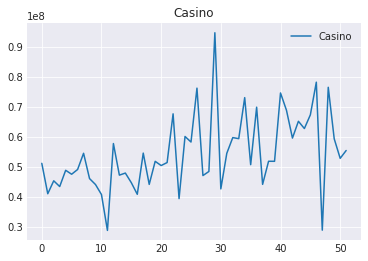

In [29]:
plt.title('Casino')
#plt.plot(mAvg_BTC['btc_market_price'])
#plt.scatter(mAvg_BTC['btc_market_price'], gamblingData['EGM'])
#plt.scatter(mAvg_BTC['btc_market_price'], gamblingData['Keno'])
#plt.scatter(mAvg_BTC['btc_market_price'], gamblingData['Lottery'])
#plt.scatter(mAvg_BTC['btc_market_price'], gamblingData['Wagering'])
plt.plot(mAvg_BTC['Casino'])
#plt.plot(mAvg_BTC['EGM'])
plt.legend()
plt.show()

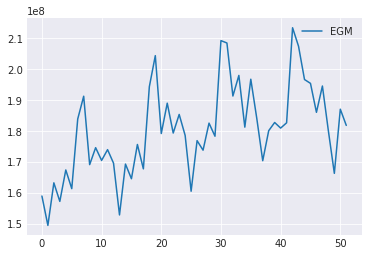

In [30]:
plt.plot(mAvg_BTC['EGM'])
plt.legend()
plt.show()

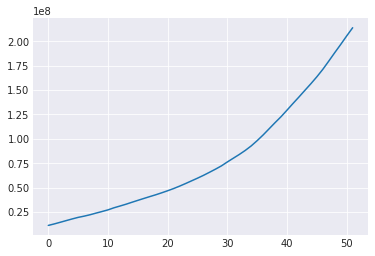

In [31]:
plt.plot(mAvg_BTC['btc_n_transactions_total'])

In [32]:
# print(mAvg_BTC.columns)
# scaledData = mAvg_BTC
# scaledData['btc_market_price'] /= max(scaledData['btc_market_price']) 
# scaledData['btc_trade_volume'] /= max(scaledData['btc_trade_volume']) 
# scaledData['btc_n_transactions_total'] /= max(scaledData['btc_n_transactions_total']) 
# scaledData['Casino'] /= max(scaledData['Casino']) 
# scaledData['EGM'] /= max(scaledData['EGM']) 
# scaledData['Keno'] /= max(scaledData['Keno']) 
# scaledData['Lottery'] /= max(scaledData['Lottery']) 
# scaledData['Wagering'] /= max(scaledData['Wagering'])
# corr = scaledData.corr()
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)

In [34]:
from sklearn import preprocessing

x = mAvg_BTC.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaledData = pd.DataFrame(x_scaled, columns = list(mAvg_BTC.columns))

corr = scaledData.corr()

In [35]:
# np.min(scaledData['btc_n_transactions_total'])

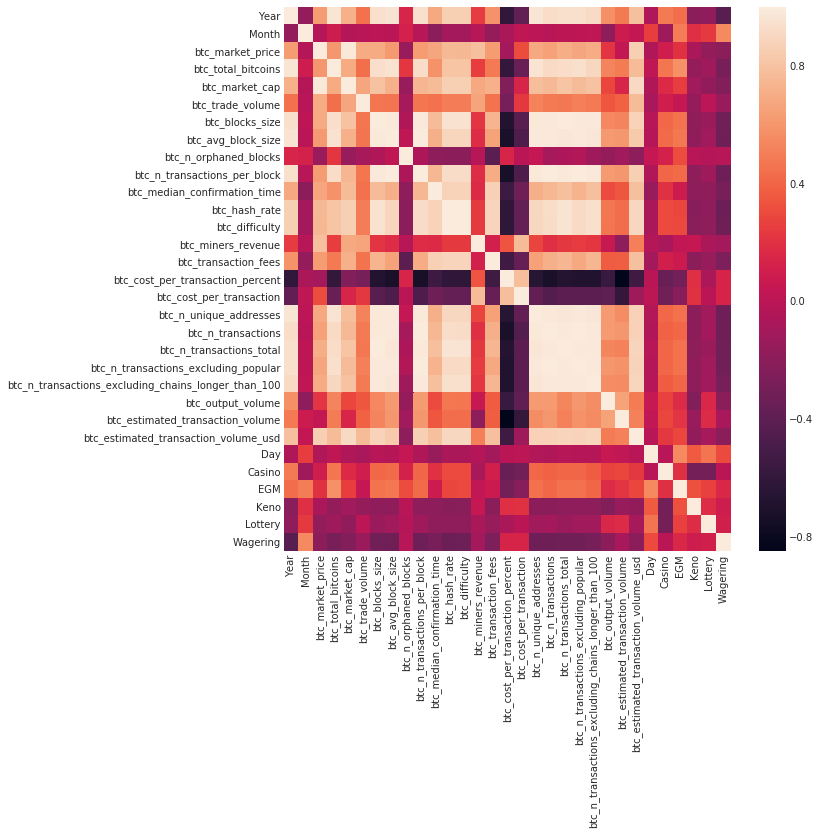

In [35]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

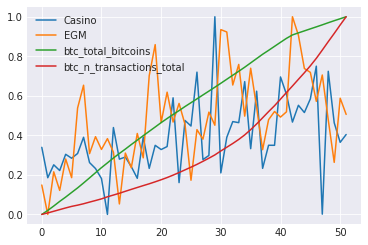

In [36]:
plt.plot(scaledData['Casino'])
plt.plot(scaledData['EGM'])
plt.plot(scaledData['btc_total_bitcoins'])
plt.plot(scaledData['btc_n_transactions_total'])
plt.legend()

### Task 1: Generate Single data for further use

In [47]:
# Using BTC DATASET
btc_dataset = pd.read_csv('Data/bitcoin_dataset.csv')
date = pd.to_datetime(btc_dataset['Date'])
btc_dataset['Day'] = date.dt.day
btc_dataset['Month'] = date.dt.month
btc_dataset['Year'] = date.dt.year

nD = btc_dataset #[['Month', 'Year', 'btc_market_price', 'btc_trade_volume', 'btc_n_transactions_total']]
# nD = nData[nData['Year'] >= 2013]

# Take Monthly Average
mAvg_BTC = nD.groupby(['Year', 'Month']).mean()
mAvg_BTC = mAvg_BTC.reset_index()

In [48]:
mAvg_BTC[:][:2]

Year  Month  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2010      2               0.0        2.132033e+06             0.0   
1  2010      3               0.0        2.282116e+06             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000260   
1               0.0              0.0            0.000268   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  ...   \
0                    0.0                           1.0  ...    
1                    0.0                           1.0  ...    

   btc_cost_per_transaction  btc_n_unique_addresses  btc_n_transactions  \
0                       0.0              185.666667          185.833333   
1                       0.0              172.580645          173.548387   

   btc_n_transactions_total  btc_n_transactions_excluding_popular  \
0              43050.500000                            185.833333   
1              46141.645161                            173.548387   

   btc_n_transactions_excluding_chains_longer_than_100  btc_output_volume  \
0                                         185.833333         14558.166667   
1                                         173.548387         13247.790000   

   btc_estimated_transaction_volume  btc_estimated_transaction_volume_usd  \
0                       4152.000000                                   0.0   
1                       4831.645161                                   0.0   

    Day  
0  25.5  
1  16.0  

[2 rows x 26 columns]

In [49]:
btcData = mAvg_BTC[:][:87]

In [50]:
gambling[:][:3]

Month  Year       Casino           EGM        Keno      Lottery  \
0      7  2004  45662132.51  1.457668e+08  6836926.58  32451660.78   
1      8  2004  36652961.84  1.436279e+08  4215418.49  24712127.10   
2      9  2004  42992131.92  1.429731e+08  6607623.55  34207867.17   

      Wagering  
0  27298552.41  
1  26147748.54  
2  27136203.30

In [96]:
# HAVE ALREADY GENERATED DATA 
# # Get Gambling data - 
# gambling = pd.read_csv('Data/Casino/updated_gambling.csv')  #20170616_OLGR_All-gambling-data.csv')
# gambling = ConvertGamblingData(gambling, splittedDate = True)
# gambling.to_csv('./Data/Casino/gamble.csv')

# reqEntries = gambling.shape[0] - btcData.shape[0]
# dim = btcData.shape[1]
# tmp = pd.DataFrame(np.zeros((reqEntries, dim)), columns = list(btcData.columns))
# fullData = tmp.append(btcData)
# fullData = fullData.reset_index(drop = True)
# fullData[['Casino', 'EGM', 'Keno', 'Lottery', 'Wagering', 'Month', 'Year']] = gambling[['Casino', 'EGM', 'Keno', 'Lottery', 'Wagering', 'Month', 'Year']] 
# fullData.to_csv('./Data/Casino/ProcessedDataAll_WRITING.csv', index = False)

# UNCOMMENT ABOVE AND COMMENT BELOW TO RE-GENERATE
fullData = pd.read_csv('./Data/Casino/ProcessedDataAll.csv')

In [97]:
fullData['Year'][-2:]

152    2017
153    2017
Name: Year, dtype: int64

In [98]:
print(gambling.shape, btcData.shape)

((154, 7), (87, 26))


### 1. Normalized the data

In [99]:
nData = averageData(fullData, ['Year', 'Month'])
nData[:][:2]

Year  Month  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2004      7               0.0                 0.0             0.0   
1  2004      8               0.0                 0.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0                 0.0   
1               0.0              0.0                 0.0   

   btc_n_orphaned_blocks  btc_n_transactions_per_block      ...       \
0                    0.0                           0.0      ...        
1                    0.0                           0.0      ...        

   btc_output_volume  btc_estimated_transaction_volume  \
0                0.0                               0.0   
1                0.0                               0.0   

   btc_estimated_transaction_volume_usd  Day       Casino           EGM  \
0                                   0.0  0.0  45662132.51  1.457668e+08   
1                                   0.0  0.0  36652961.84  1.436279e+08   

         Keno      Lottery     Wagering  btc_per_year  
0  6836926.58  32451660.78  27298552.41           0.0  
1  4215418.49  24712127.10  26147748.54           0.0  

[2 rows x 32 columns]

('Graph: ', 'btc_market_price')


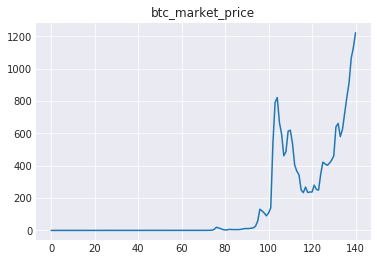

('Graph: ', 'btc_total_bitcoins')


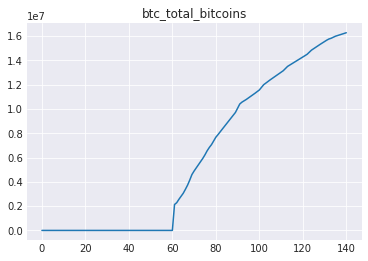

('Graph: ', 'btc_market_cap')


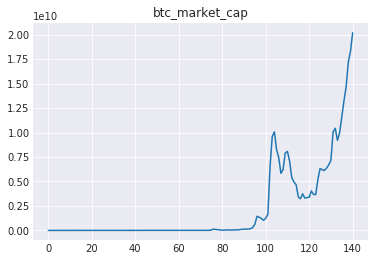

('Graph: ', 'btc_trade_volume')


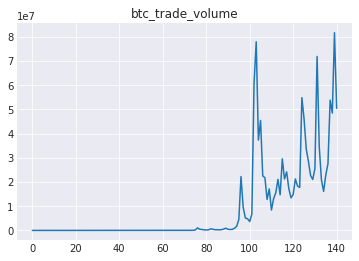

('Graph: ', 'btc_blocks_size')


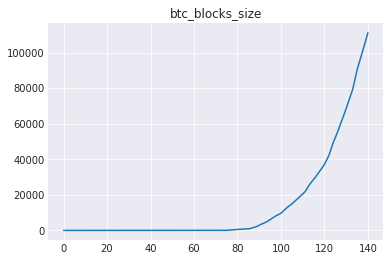

('Graph: ', 'btc_avg_block_size')


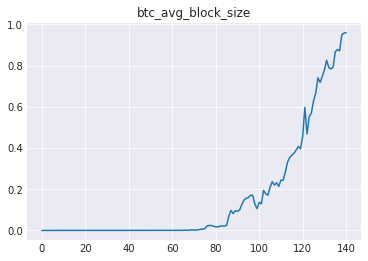

('Graph: ', 'btc_n_orphaned_blocks')


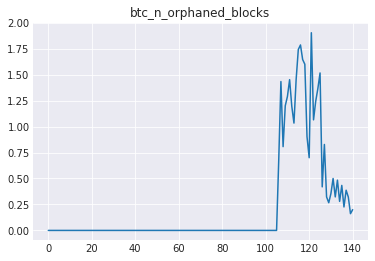

('Graph: ', 'btc_n_transactions_per_block')


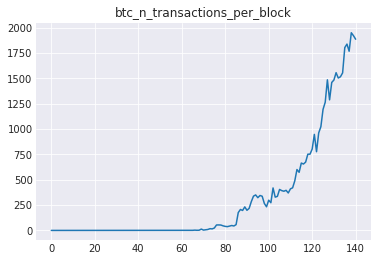

('Graph: ', 'btc_median_confirmation_time')


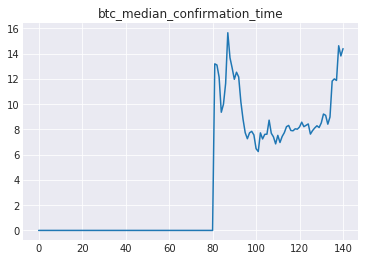

('Graph: ', 'btc_hash_rate')


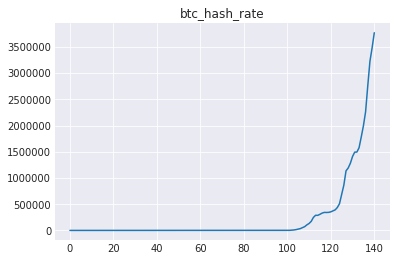

('Graph: ', 'btc_difficulty')


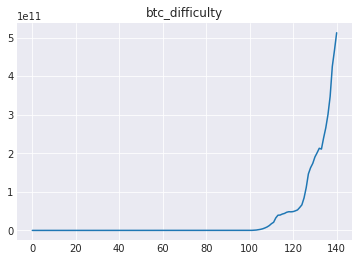

('Graph: ', 'btc_miners_revenue')


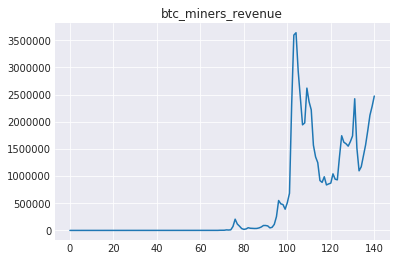

('Graph: ', 'btc_transaction_fees')


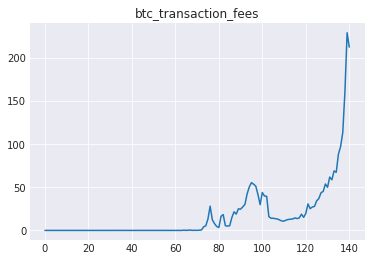

('Graph: ', 'btc_cost_per_transaction_percent')


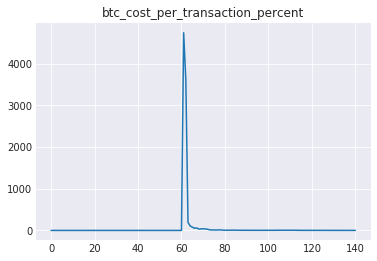

('Graph: ', 'btc_cost_per_transaction')


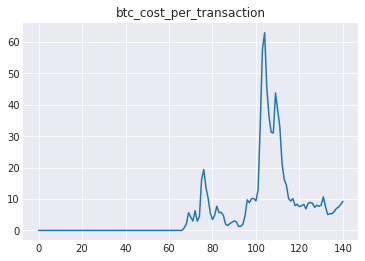

('Graph: ', 'btc_n_unique_addresses')


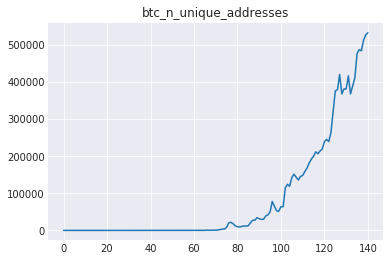

('Graph: ', 'btc_n_transactions')


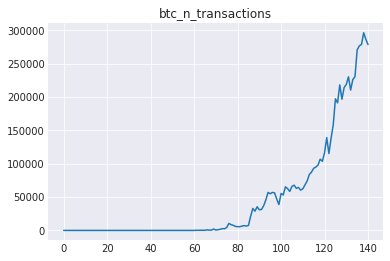

('Graph: ', 'btc_n_transactions_total')


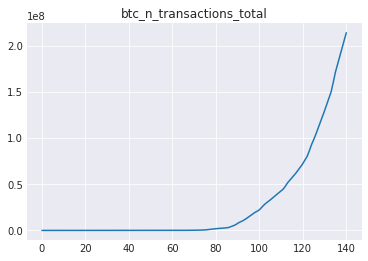

('Graph: ', 'btc_n_transactions_excluding_popular')


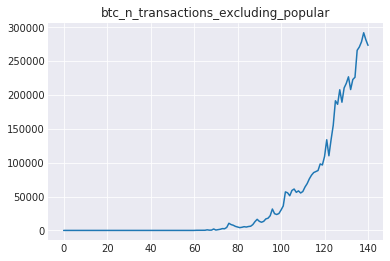

('Graph: ', 'btc_n_transactions_excluding_chains_longer_than_100')


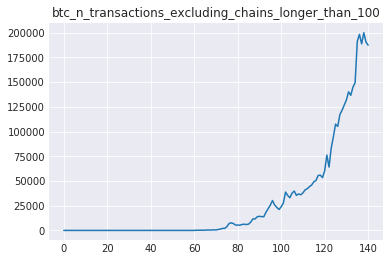

('Graph: ', 'btc_output_volume')


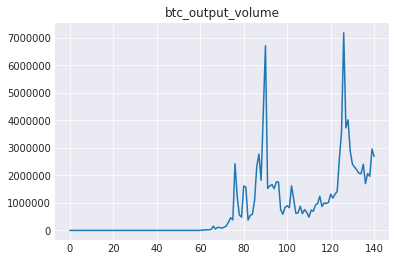

('Graph: ', 'btc_estimated_transaction_volume')


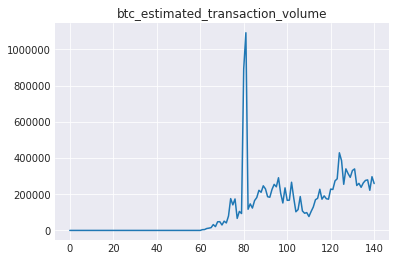

('Graph: ', 'btc_estimated_transaction_volume_usd')


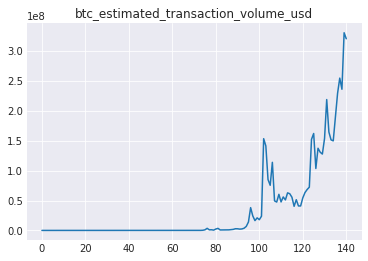

('Graph: ', 'Day')


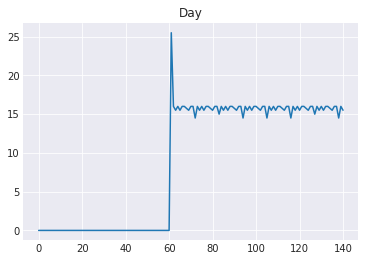

('Graph: ', 'Casino')


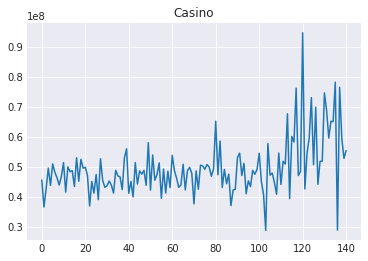

('Graph: ', 'EGM')


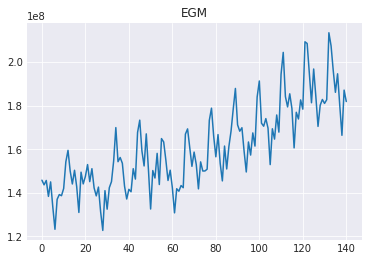

('Graph: ', 'Keno')


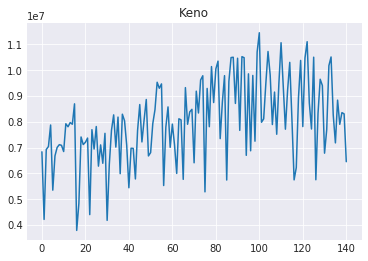

('Graph: ', 'Lottery')


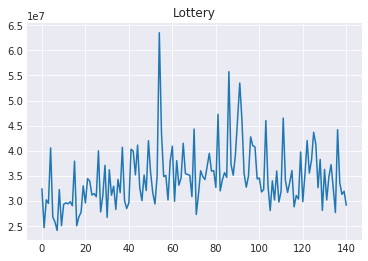

('Graph: ', 'Wagering')


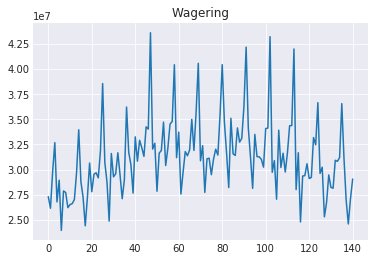

('Graph: ', 'btc_per_year')


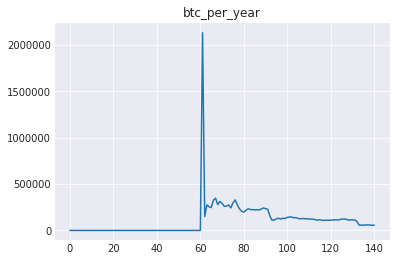

In [100]:
plotAllFields(nData, start = 2, dateClass = False)

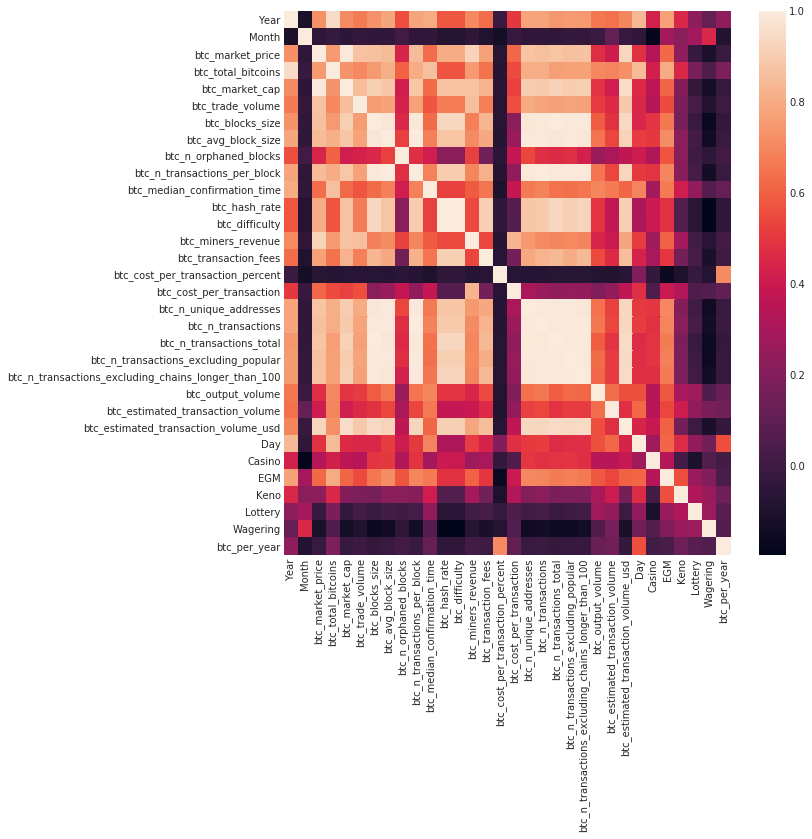

In [102]:
scaledData = dataNormalization(nData)
plotCorrelation(scaledData)

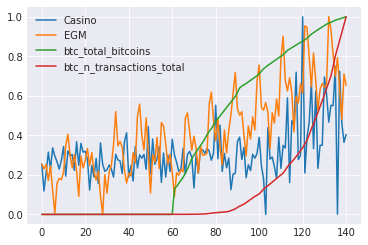

In [103]:
plt.plot(scaledData['Casino'])
plt.plot(scaledData['EGM'])
plt.plot(scaledData['btc_total_bitcoins'])
plt.plot(scaledData['btc_n_transactions_total'])
plt.legend()

### CDF of data

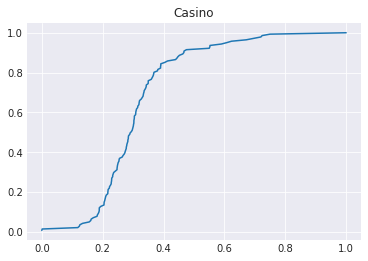

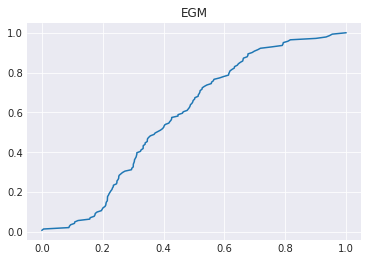

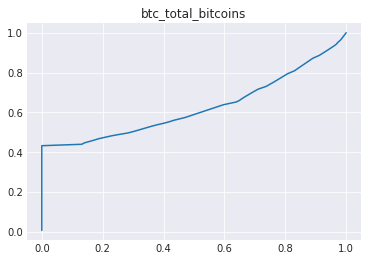

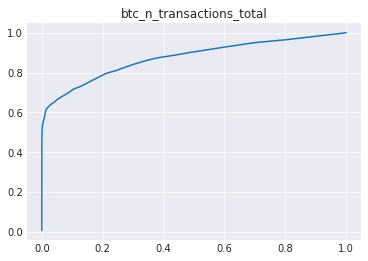

KeyError: 'btc'

In [104]:
analyzeCDFs(scaledData, ['Casino', 'EGM', 'btc_total_bitcoins', 'btc_n_transactions_total', 'btc_per_year'])

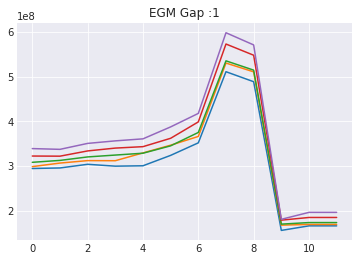

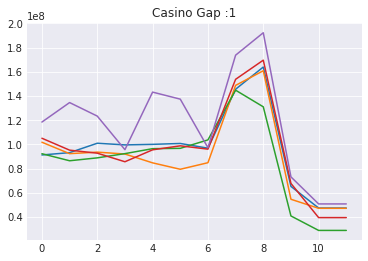

In [153]:
plotD(fullData, 1, 'EGM')
plotD(fullData, 1, 'Casino')

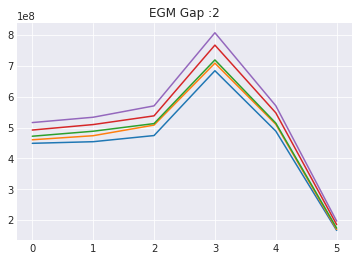

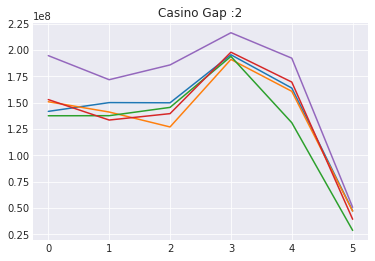

In [154]:
plotD(fullData, 2, 'EGM')
plotD(fullData, 2, 'Casino')

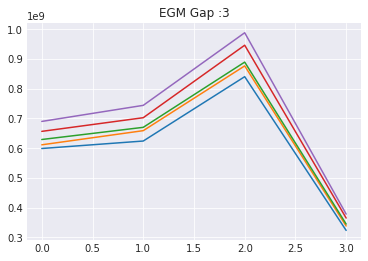

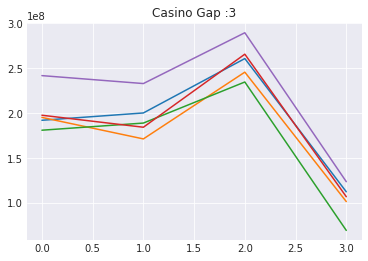

In [155]:
plotD(fullData, 3, 'EGM')
plotD(fullData, 3, 'Casino')

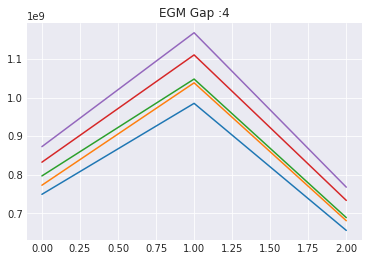

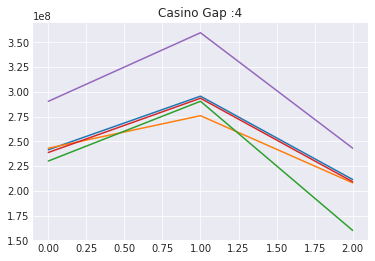

In [156]:
plotD(fullData, 4, 'EGM')
plotD(fullData, 4, 'Casino')

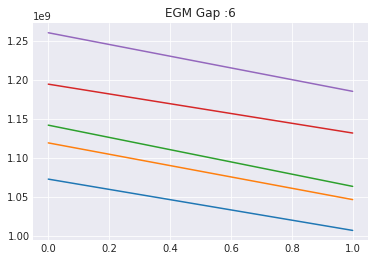

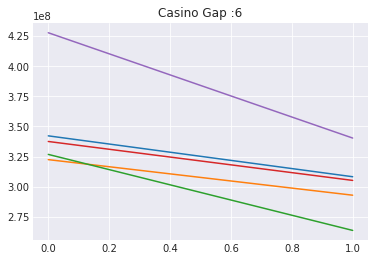

In [157]:
plotD(fullData, 6, 'EGM')
plotD(fullData, 6, 'Casino')

### 2. Seasaonal data analysis
April to July is Peak period for gambling Hence analysis only Summer data

In [152]:
def analysisOfSeasonal(data, start, end):
    SummerData = data[data['Month'] >= start]
    SummerData = data[data['Month'] <= end]
    scaledData = dataNormalization(SummerData)
    plotCorrelation(scaledData)
    analyzeCDFs(scaledData, ['Casino', 'EGM', 'Lottery', 'btc_total_bitcoins', 'btc_n_transactions_total', 'btc_per_year'])
    plt.plot(scaledData['btc_total_bitcoins'])
    plt.plot(scaledData['EGM'])
    plt.plot(scaledData['Casino'])
    plt.plot(scaledData['Lottery'])
    plt.plot(scaledData['btc_per_year'])
    plt.legend()  

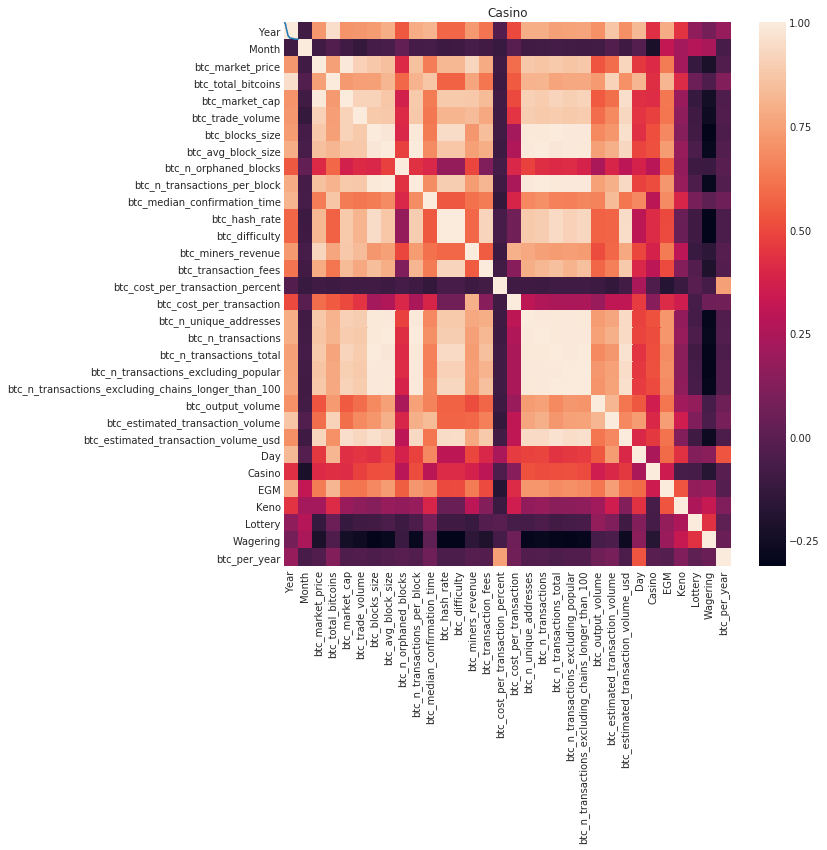

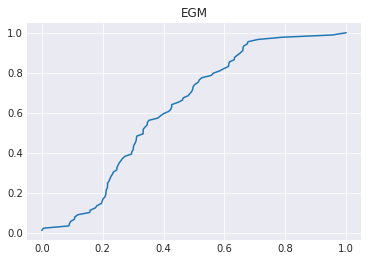

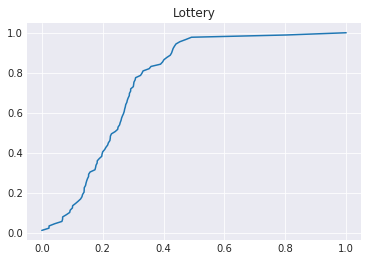

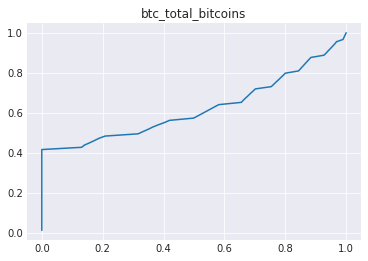

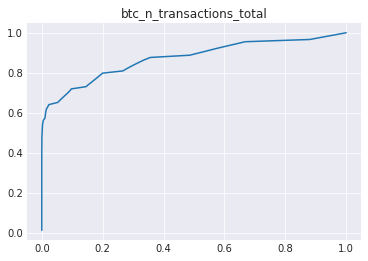

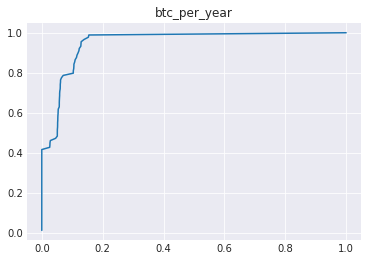

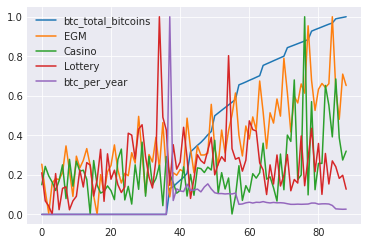

In [110]:
data = fullData #fullData[fullData['Year'] >= 2013]
analysisOfSeasonal(data, 4, 7)

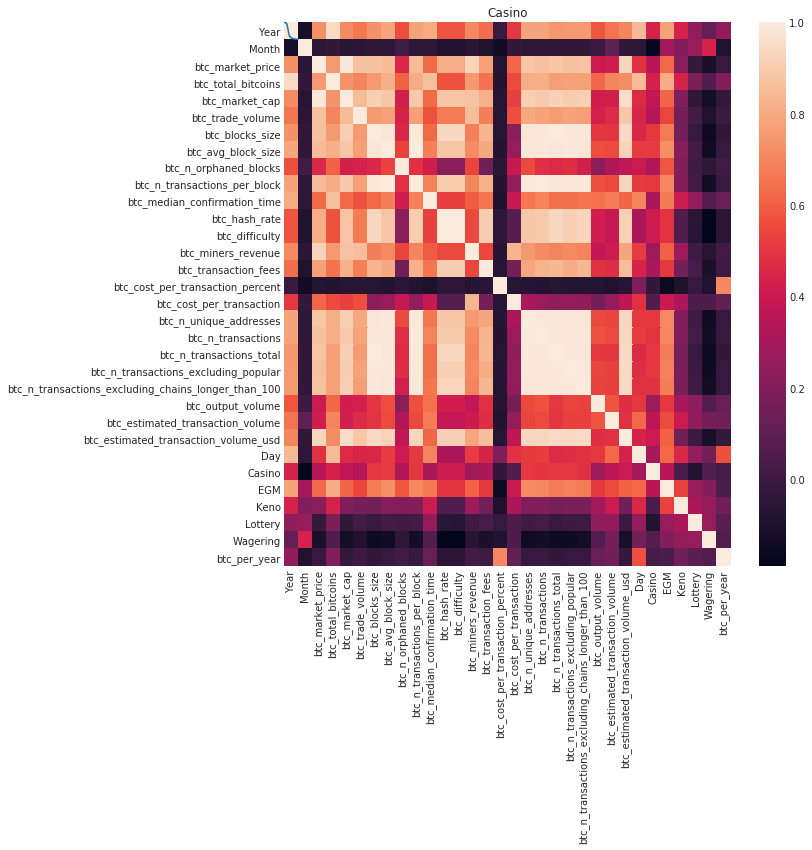

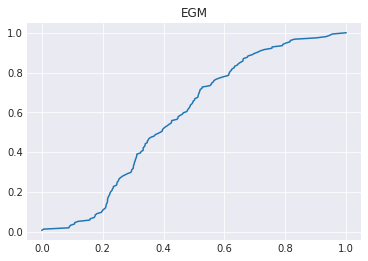

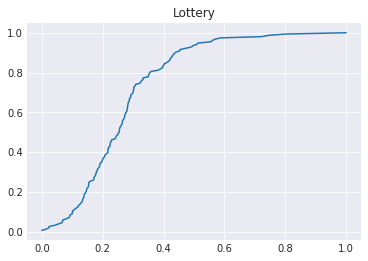

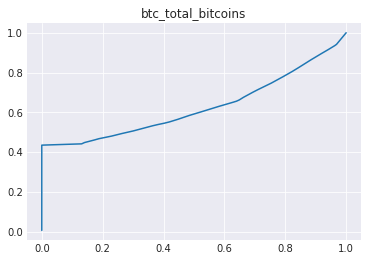

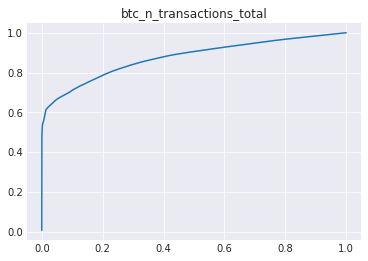

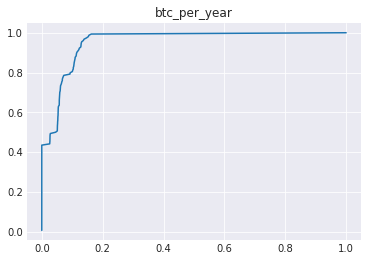

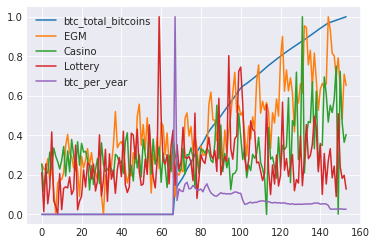

In [111]:
data = fullData #fullData[fullData['Year'] >= 2013]
analysisOfSeasonal(data, 1, 12)

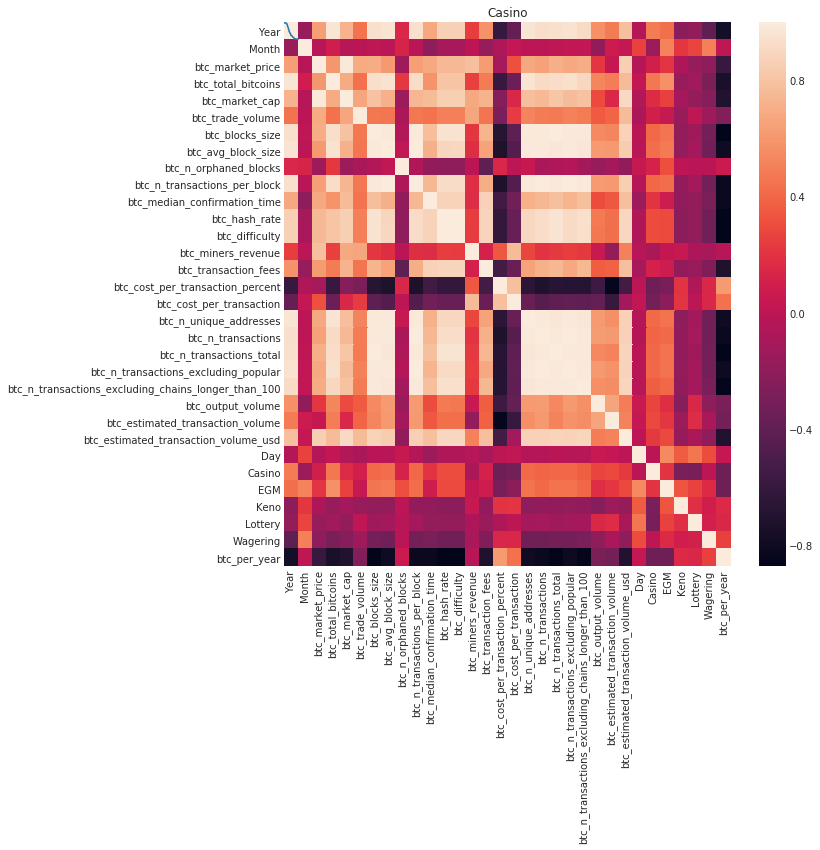

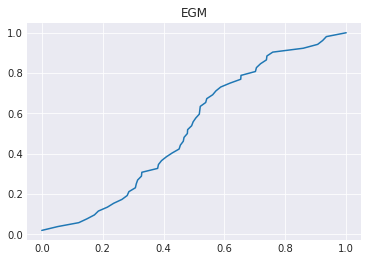

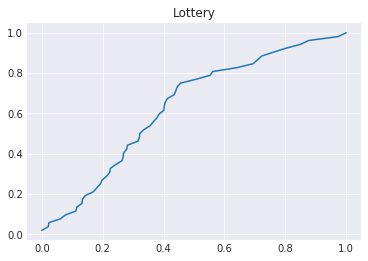

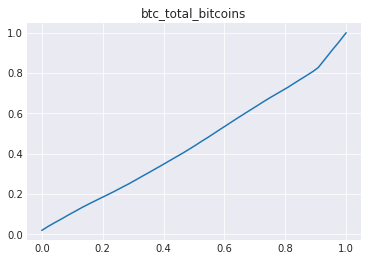

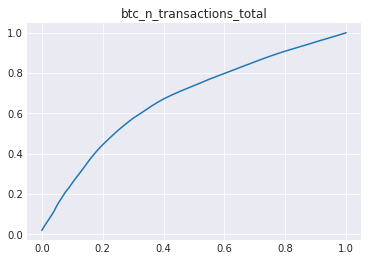

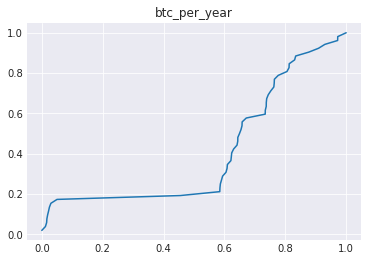

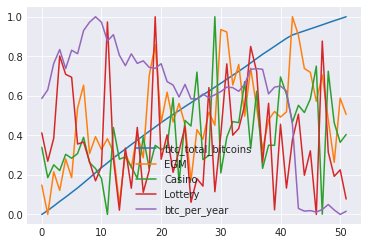

In [112]:
data = fullData[fullData['Year'] >= 2013]
analysisOfSeasonal(data, 1, 12)

### Analyis Year over Year

In [113]:
fData = pd.read_csv('./Data/Casino/ProcessedDataAll.csv')
nData = averageData(fData, ['Year'])
nData[:][:2]

Year     Month  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2004  9.166667               0.0                 0.0             0.0   
1  2005  6.333333               0.0                 0.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0                 0.0   
1               0.0              0.0                 0.0   

   btc_n_orphaned_blocks  btc_n_transactions_per_block      ...       \
0                    0.0                           0.0      ...        
1                    0.0                           0.0      ...        

   btc_output_volume  btc_estimated_transaction_volume  \
0                0.0                               0.0   
1                0.0                               0.0   

   btc_estimated_transaction_volume_usd  Day        Casino           EGM  \
0                                   0.0  0.0  4.357442e+07  1.439966e+08   
1                                   0.0  0.0  4.739821e+07  1.434488e+08   

           Keno       Lottery      Wagering  btc_per_year  
0  6.637830e+06  3.129293e+07  2.874819e+07           0.0  
1  7.364004e+06  2.912136e+07  2.807978e+07           0.0  

[2 rows x 32 columns]

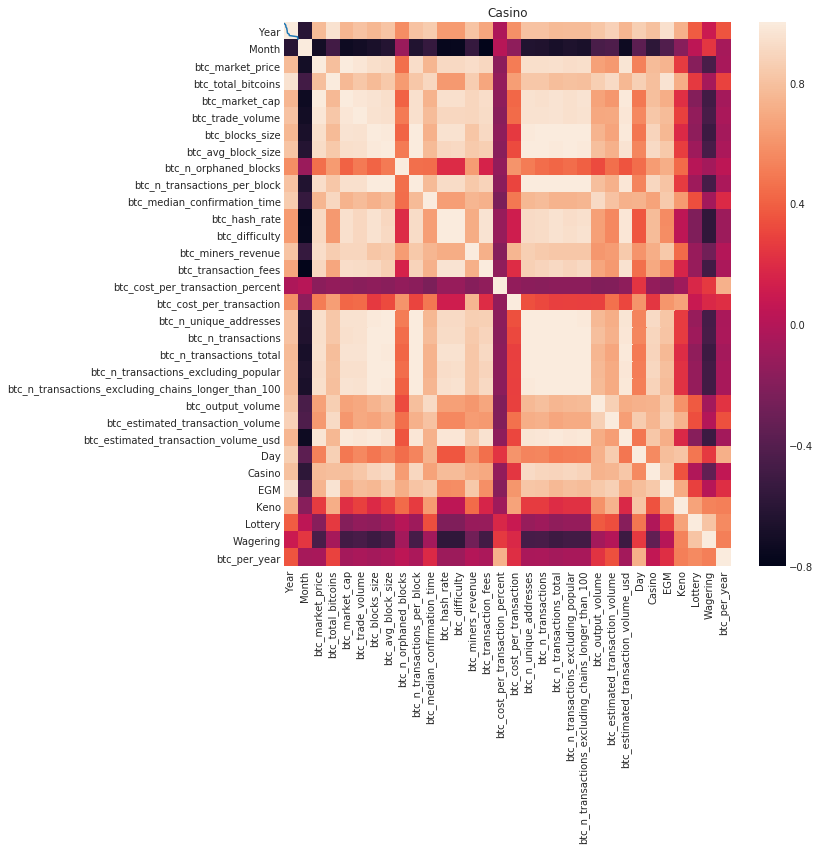

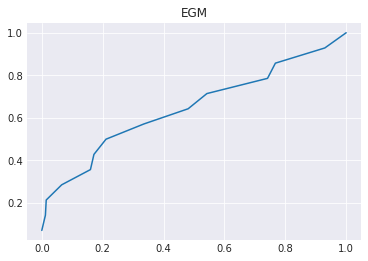

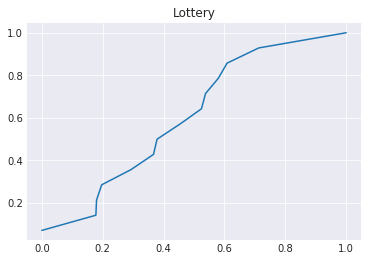

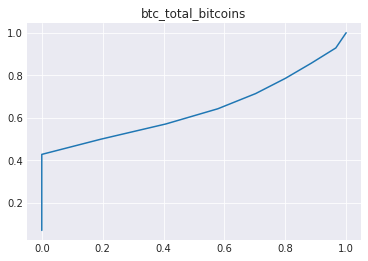

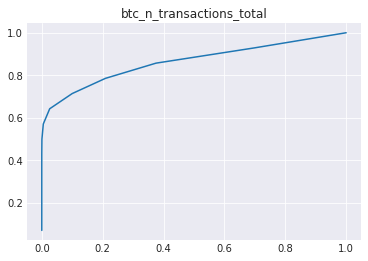

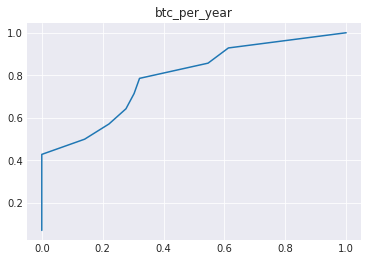

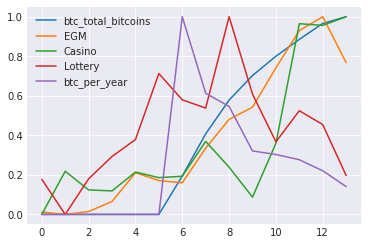

In [114]:
analysisOfSeasonal(nData, 1, 12)

In [115]:
# KS-Test for Year over Year
from scipy import stats
_, egmY = utils.plot_a(np.array(nData['EGM']))
_, casinoY = utils.plot_a(np.array(nData['Casino']))
_, tBTCP = utils.plot_a(np.array(nData['btc_market_price']))
_, tBTCY = utils.plot_a(np.array(nData['btc_total_bitcoins']))
_, tBTCY1 = utils.plot_a(np.array(nData['btc_per_year']))

print(stats.ks_2samp(egmY, tBTCP))
print(stats.ks_2samp(casinoY, tBTCP))
print(stats.ks_2samp(egmY, tBTCY))
print(stats.ks_2samp(casinoY, tBTCY))
print(stats.ks_2samp(egmY, tBTCY1))
print(stats.ks_2samp(casinoY, tBTCY1))

Ks_2sampResult(statistic=0.0, pvalue=1.0)
Ks_2sampResult(statistic=0.0, pvalue=1.0)
Ks_2sampResult(statistic=0.0, pvalue=1.0)
Ks_2sampResult(statistic=0.0, pvalue=1.0)
Ks_2sampResult(statistic=0.0, pvalue=1.0)
Ks_2sampResult(statistic=0.0, pvalue=1.0)


In [116]:
fData = pd.read_csv('./Data/Casino/ProcessedDataAll.csv')
nData = averageData(fData, ['Year'])
nData[:][:2]

Year     Month  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2004  9.166667               0.0                 0.0             0.0   
1  2005  6.333333               0.0                 0.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0                 0.0   
1               0.0              0.0                 0.0   

   btc_n_orphaned_blocks  btc_n_transactions_per_block      ...       \
0                    0.0                           0.0      ...        
1                    0.0                           0.0      ...        

   btc_output_volume  btc_estimated_transaction_volume  \
0                0.0                               0.0   
1                0.0                               0.0   

   btc_estimated_transaction_volume_usd  Day        Casino           EGM  \
0                                   0.0  0.0  4.357442e+07  1.439966e+08   
1                                   0.0  0.0  4.739821e+07  1.434488e+08   

           Keno       Lottery      Wagering  btc_per_year  
0  6.637830e+06  3.129293e+07  2.874819e+07           0.0  
1  7.364004e+06  2.912136e+07  2.807978e+07           0.0  

[2 rows x 32 columns]

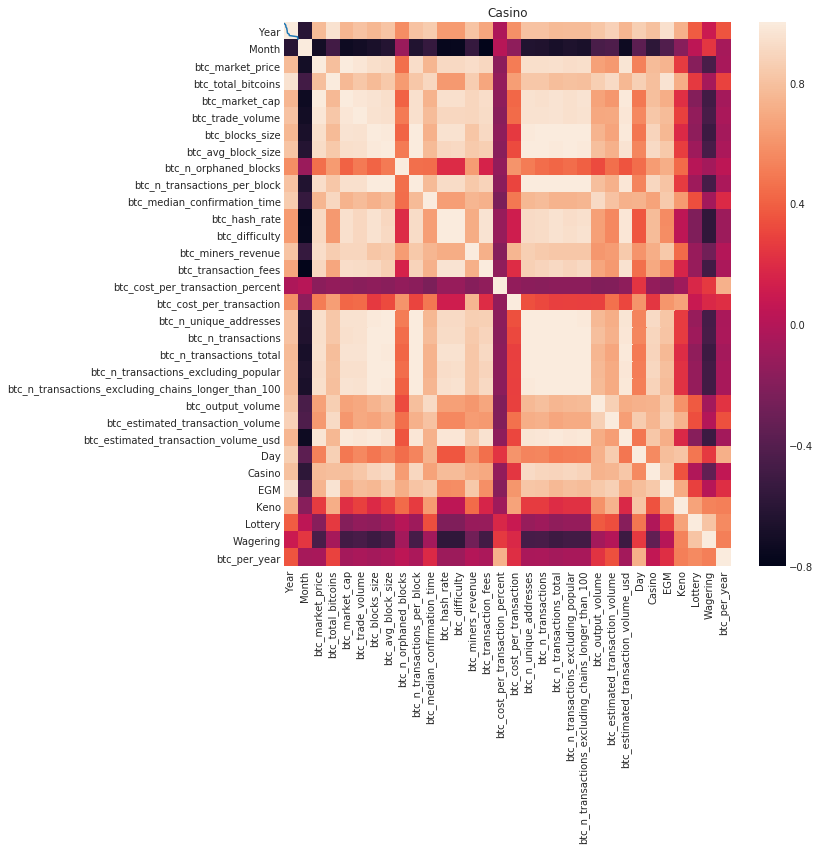

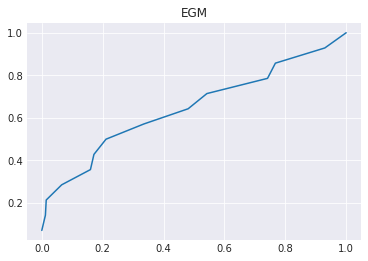

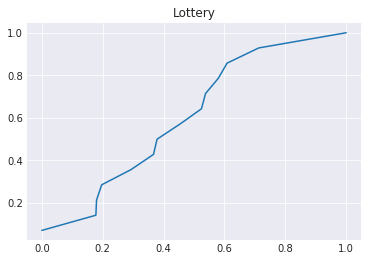

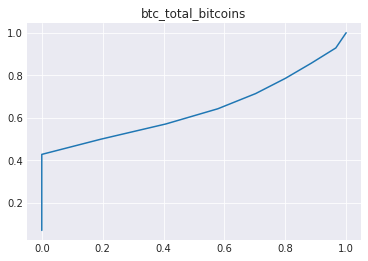

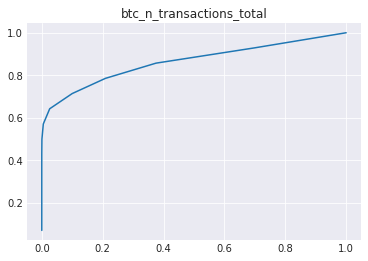

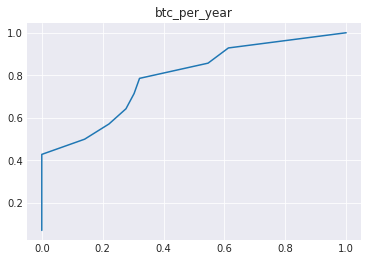

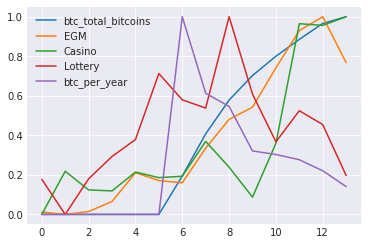

In [117]:
analysisOfSeasonal(nData, 1, 12)

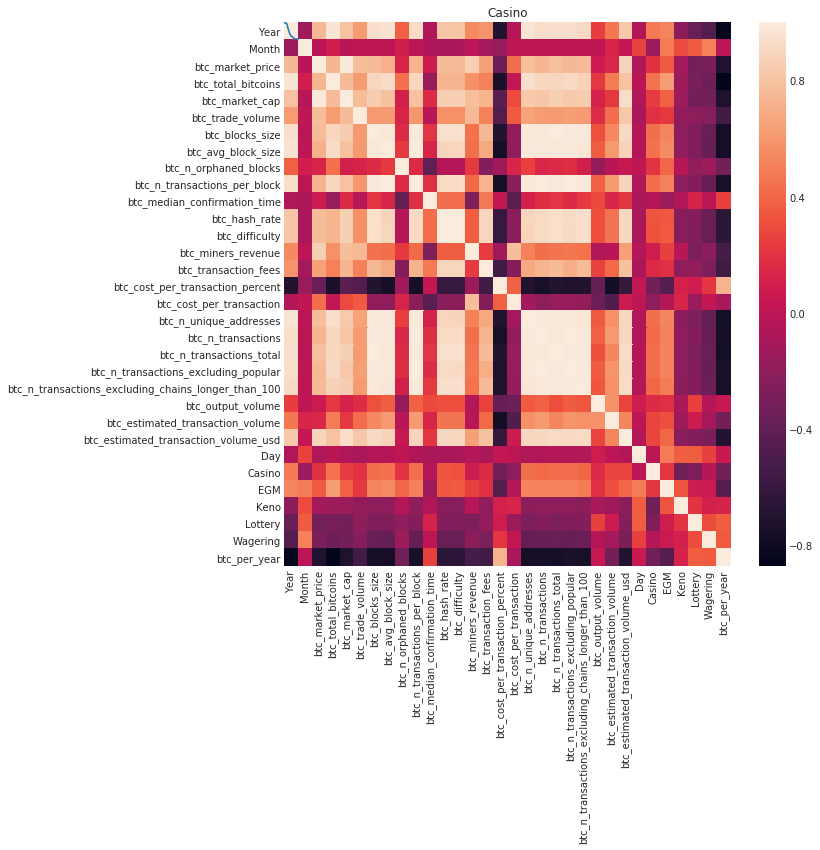

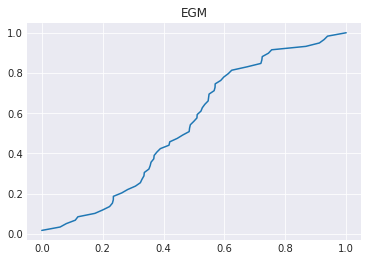

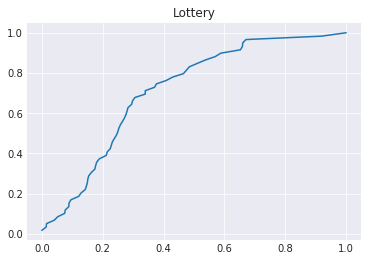

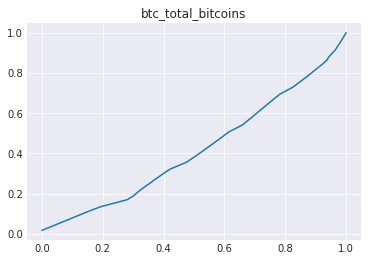

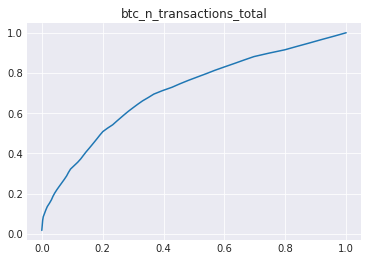

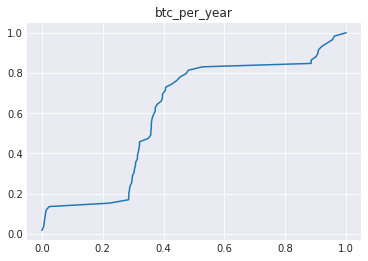

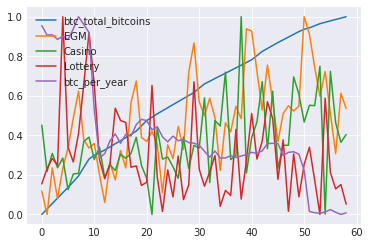

In [144]:
# Monthly Analysis
fData = pd.read_csv('./Data/Casino/ProcessedDataAll.csv')
fData = fData[fData['Year'] >= 2012]
nData = averageData(fData, ['Year', 'Month'])
analysisOfSeasonal(nData, 1, 12)

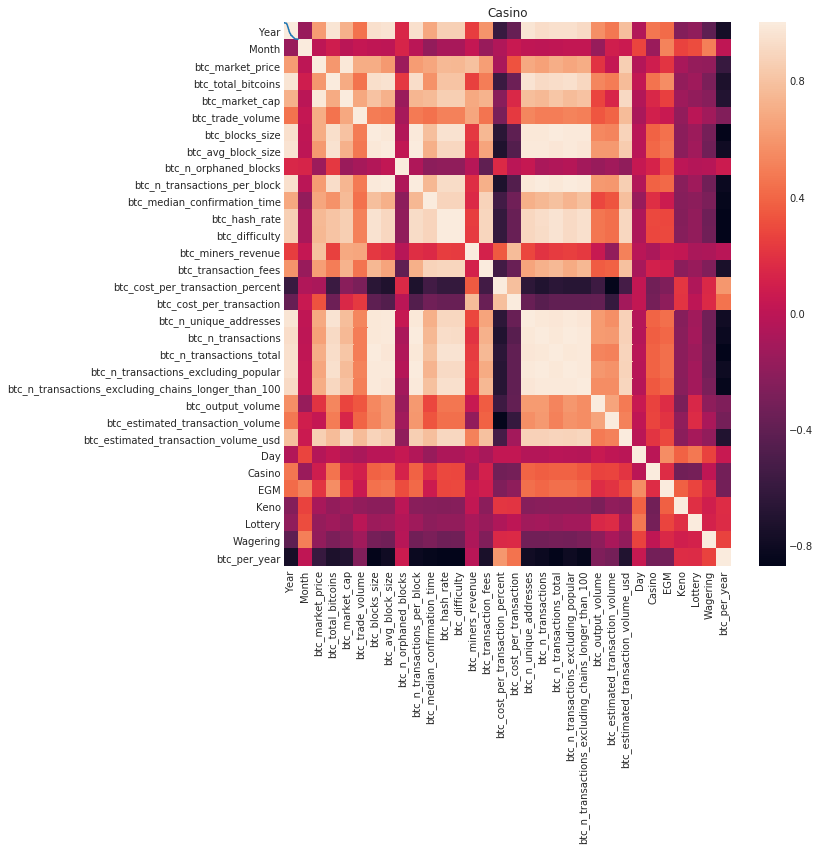

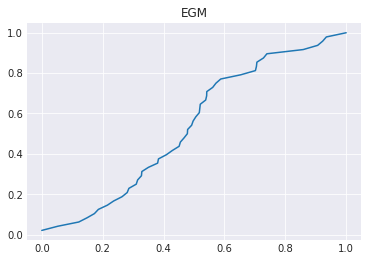

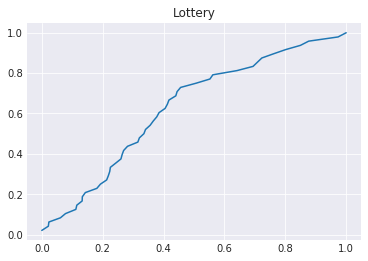

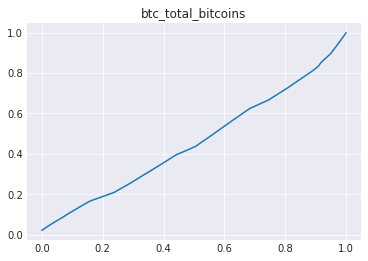

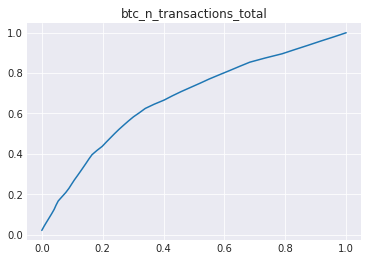

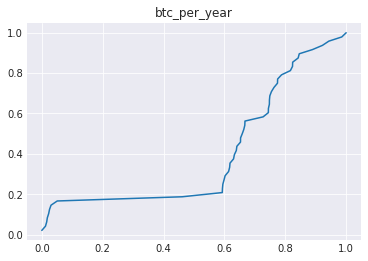

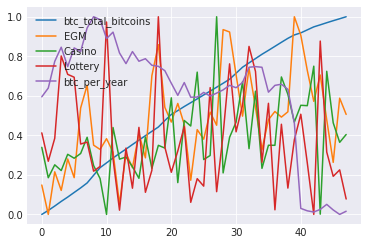

In [137]:
# Monthly Analysis
fData = pd.read_csv('./Data/Casino/ProcessedDataAll.csv')
fData = fData[fData['Year'] >= 2013]
nData = averageData(fData, ['Year', 'Month'])
analysisOfSeasonal(nData, 1, 12)

In [120]:
print(stats.kstest(np.array(nData['Casino']),'norm', mode='asymp'))
print(stats.kstest(np.array(nData['EGM']),'norm', mode='asymp'))
print(stats.kstest(np.array(nData['btc_per_year']),'norm', mode='asymp'))
print(stats.kstest(np.array(nData['btc_total_bitcoins']),'norm', mode='asymp'))

KstestResult(statistic=1.0, pvalue=4.06218532546968e-42)
KstestResult(statistic=1.0, pvalue=4.06218532546968e-42)
KstestResult(statistic=1.0, pvalue=4.06218532546968e-42)
KstestResult(statistic=1.0, pvalue=4.06218532546968e-42)


In [147]:
sData = dataNormalization(nData)
runTests(np.array(sData['Casino']), np.array(sData['btc_per_year']), 'Casino and Yearly Bitcoins')
runTests(np.array(sData['EGM']), np.array(sData['btc_per_year']), 'EGM and BitCoin Price')
runTests(np.array(sData['Lottery']), np.array(sData['btc_per_year']), 'Lottery and BitCoin Price')
runTests(np.array(sData['Keno']), np.array(sData['btc_per_year']), 'Keno and BitCoin Price')
runTests(np.array(sData['Wagering']), np.array(sData['btc_per_year']), 'Wagering and BitCoin Price')

== Running Tests for Casino and Yearly Bitcoins ==
0.8477437699835663
Accept Null
P-Value: 0.396580684475
CI: [-0.04732424618789166, 0.11946380143113078] 
P-Val of P-Test: 0.40265
== Running Tests for EGM and BitCoin Price ==
1.3545976551439924
Accept Null
P-Value: 0.175545780972
CI: [-0.027686649572338018, 0.15158531269496844] 
P-Val of P-Test: 0.18022
== Running Tests for Lottery and BitCoin Price ==
2.3957541817967143
Reject Null
P-Value: 0.016586209675
CI: [0.019460444587807033, 0.19452461142990873] 
P-Val of P-Test: 0.01854
== Running Tests for Keno and BitCoin Price ==
2.7283674572952727
Reject Null
P-Value: 0.00636486628317
CI: [0.037573944630184875, 0.22926590340834446] 
P-Val of P-Test: 0.00827
== Running Tests for Wagering and BitCoin Price ==
0.8319677287605489
Accept Null
P-Value: 0.405427160255
CI: [-0.04924247586955509, 0.12187896305573319] 
P-Val of P-Test: 0.4111


In [18]:
sData = dataNormalization(nData)
runTests(np.array(sData['Casino']), np.array(sData['btc_market_price']), 'Casino and Yearly Bitcoins')
runTests(np.array(sData['EGM']), np.array(sData['btc_market_price']), 'EGM and BitCoin Price')
runTests(np.array(sData['Lottery']), np.array(sData['btc_market_price']), 'Lottery and BitCoin Price')
runTests(np.array(sData['Keno']), np.array(sData['btc_market_price']), 'Keno and BitCoin Price')
runTests(np.array(sData['Wagering']), np.array(sData['btc_market_price']), 'Wagering and BitCoin Price')

== Running Tests for Casino and Yearly Bitcoins ==
1.7092907963161525
Accept Null
P-Value: 0.0873970973073
CI: [-0.010335178906164075, 0.15126200506978804] 
P-Val of P-Test: 0.09325
== Running Tests for EGM and BitCoin Price ==
3.7858429363679993
Reject Null
P-Value: 0.000153188412512
CI: [0.08125604478290217, 0.25570899974659134] 
P-Val of P-Test: 0.00031
== Running Tests for Lottery and BitCoin Price ==
0.01058393263175036
Accept Null
P-Value: 0.991555401221
CI: [-0.08460366809720393, 0.08552234270805664] 
P-Val of P-Test: 0.99174
== Running Tests for Keno and BitCoin Price ==
5.02484822097148
Reject Null
P-Value: 5.03830839679e-07
CI: [0.14635663495368986, 0.3335495944917025] 
P-Val of P-Test: 0.0
== Running Tests for Wagering and BitCoin Price ==
1.657428102196329
Accept Null
P-Value: 0.0974329537266
CI: [-0.01281809435547035, 0.15324798857615532] 
P-Val of P-Test: 0.10234


## Linear regression

In [58]:
def linearRegression(sData, xFields, yField): 
    sData = sData.sample(frac=1)
    trainX = np.array(sData[xFields][:50])
    trainY = np.array(sData[yField][:50])
    testX = np.array(sData[xFields][-9:])
    testY = np.array(sData[yField][-9:])

    regr = linear_model.LinearRegression()
    regr.fit(trainX, trainY)
    print('Coefficients: \n', regr.coef_)
    return regr, testX, testY

def predict(regr, testX, testY):
    predY = regr.predict(testX)
    print("Mean squared error: %.2f"
          % mean_squared_error(testY, predY))
    print('Variance score: %.2f' % r2_score(testY, predY))
    return predY

def plot(testX, testY, predY):
    plt.scatter(testX, testY,  color='black')
    plt.plot(testX, predY, color='blue', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()

('Coefficients: \n', array([-0.38592158]))
Mean squared error: 0.07
Variance score: -0.01


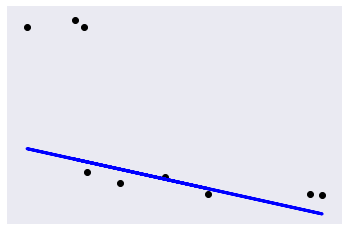

In [219]:
linearRegression(sData, ['Casino'], 'btc_per_year')

('Coefficients: \n', array([0.32900379]))
Mean squared error: 0.07
Variance score: -0.19


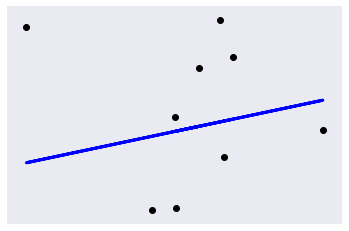

In [220]:
linearRegression(sData, ['Casino'], 'btc_market_price')

### Running LR on full data

('Coefficients: \n', array([0.84069202]))
Mean squared error: 0.07
Variance score: 0.00


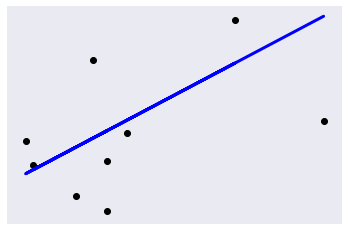

In [224]:
lr, tX, tY = linearRegression(sData, ['Casino'], 'btc_n_unique_addresses')
pY = predict(lr, tX, tY)
plot(tX, tY, pY)

In [234]:
lr = linearRegression(sData, ['EGM', 'Casino', 'Keno', 'Lottery', 'Wagering'], 'btc_per_year')

('Coefficients: \n', array([-0.71281586, -0.0699853 ,  0.25329023,  0.29152883,  0.46394249]))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [235]:
linearRegression(sData, ['EGM', 'Casino', 'Keno', 'Lottery', 'Wagering'], 'btc_market_price')

('Coefficients: \n', array([ 0.57092793, -0.08776851, -0.2091737 , -0.32521573, -0.35062852]))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Analysis with >= 2012 

In [4]:
fData = pd.read_csv('./Data/Casino/ProcessedDataAll.csv')
fData = fData[fData['Year'] >= 2012]
nData = analysis.averageData(fData, ['Year', 'Month'])

In [9]:
sData = dataNormalization(nData)
runTests(np.array(sData['Casino']), np.array(sData['btc_per_year']), 'Casino and Yearly Bitcoins')
runTests(np.array(sData['EGM']), np.array(sData['btc_per_year']), 'EGM and BitCoin Price')
runTests(np.array(sData['Lottery']), np.array(sData['btc_per_year']), 'Lottery and BitCoin Price')
runTests(np.array(sData['Keno']), np.array(sData['btc_per_year']), 'Keno and BitCoin Price')
runTests(np.array(sData['Wagering']), np.array(sData['btc_per_year']), 'Wagering and BitCoin Price')

== Running Tests for Casino and Yearly Bitcoins ==
0.8477437699835663
Accept Null
P-Value: 0.396580684475
CI: [-0.04732424618789166, 0.11946380143113078] 
P-Val of P-Test: 0.40261
== Running Tests for EGM and BitCoin Price ==
1.3545976551439924
Accept Null
P-Value: 0.175545780972
CI: [-0.027686649572338018, 0.15158531269496844] 
P-Val of P-Test: 0.18269
== Running Tests for Lottery and BitCoin Price ==
2.3957541817967143
Reject Null
P-Value: 0.016586209675
CI: [0.019460444587807033, 0.19452461142990873] 
P-Val of P-Test: 0.01902
== Running Tests for Keno and BitCoin Price ==
2.7283674572952727
Reject Null
P-Value: 0.00636486628317
CI: [0.037573944630184875, 0.22926590340834446] 
P-Val of P-Test: 0.00773
== Running Tests for Wagering and BitCoin Price ==
0.8319677287605489
Accept Null
P-Value: 0.405427160255
CI: [-0.04924247586955509, 0.12187896305573319] 
P-Val of P-Test: 0.41237


In [10]:
sData = dataNormalization(nData)
runTests(np.array(sData['Casino']), np.array(sData['btc_market_price']), 'Casino and Yearly Bitcoins')
runTests(np.array(sData['EGM']), np.array(sData['btc_market_price']), 'EGM and BitCoin Price')
runTests(np.array(sData['Lottery']), np.array(sData['btc_market_price']), 'Lottery and BitCoin Price')
runTests(np.array(sData['Keno']), np.array(sData['btc_market_price']), 'Keno and BitCoin Price')
runTests(np.array(sData['Wagering']), np.array(sData['btc_market_price']), 'Wagering and BitCoin Price')

== Running Tests for Casino and Yearly Bitcoins ==
1.7092907963161525
Accept Null
P-Value: 0.0873970973073
CI: [-0.010335178906164075, 0.15126200506978804] 
P-Val of P-Test: 0.09182
== Running Tests for EGM and BitCoin Price ==
3.7858429363679993
Reject Null
P-Value: 0.000153188412512
CI: [0.08125604478290217, 0.25570899974659134] 
P-Val of P-Test: 0.00029
== Running Tests for Lottery and BitCoin Price ==
0.01058393263175036
Accept Null
P-Value: 0.991555401221
CI: [-0.08460366809720393, 0.08552234270805664] 
P-Val of P-Test: 0.99144
== Running Tests for Keno and BitCoin Price ==
5.02484822097148
Reject Null
P-Value: 5.03830839679e-07
CI: [0.14635663495368986, 0.3335495944917025] 
P-Val of P-Test: 0.0
== Running Tests for Wagering and BitCoin Price ==
1.657428102196329
Accept Null
P-Value: 0.0974329537266
CI: [-0.01281809435547035, 0.15324798857615532] 
P-Val of P-Test: 0.10383


In [50]:
lr, tX, tY = linearRegression(sData, ['EGM', 'Casino', 'Keno', 'Lottery', 'Wagering'], 'btc_per_year')

('Coefficients: \n', array([-0.50774945, -0.17593424,  0.14436783,  0.32447478,  0.39850025]))


In [17]:
linearRegression(sData, ['EGM', 'Casino', 'Keno', 'Lottery', 'Wagering'], 'btc_market_price')

('Coefficients: \n', array([ 0.48578302, -0.20891532, -0.27283323, -0.34154201, -0.33629236]))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Before and After 2013

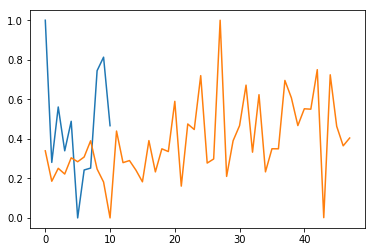

In [46]:
before = nData[nData['Year'] < 2013]
after = nData[nData['Year'] >= 2013]

bData = dataNormalization(before)
aData = dataNormalization(after)
plt.plot(bData['Casino'])
plt.plot(aData['Casino'])
plt.show()